# Introduction

The insurance company plans to use a logistic regression model in an attempt to improve its customer retention and sales practices.

The data set is sourced from a Kaggle contribution: https://www.kaggle.com/rluyck/insurance-company?select=Customer_data.csv

The task of this assignment is to predict whether custormers did or did not sign up for the new product.

The response is 'TARGET'. It is an indicator of buying the new product (0 = no, 1= yes)


- 1. About Dataset
- 2. Data Summary
- 3. Exploratory Data Analysis
- 4. Data Preparation
  - Check duplicate
  - Process Missing values
  - Convert data to valid values
  - Convert data type
  - Drop outliers

- 5. Prepped Data Review (Re-run Exploratory Data Analysis)

- 6. Feature selecting
  - Split data set
  
  - normalization & standardization

  - select features for Possion Regression

  - select features for negative binomial regression models

  - select features for multiple linear regression

- 7. Regression Modeling
  - 3 Logistic Regression Models

- 8. Select Models 

  Evaluate and identify the preferred model.
  
- 9. Conclusion

- 10. Reference

# 1. About Dataset
The response variable: TARGET

Attribute's Name and their Description

 0.   TARGET      Indicator of buying the new product (0 = no, 1= yes) 
 1.   loyalty     Loyalty level, from low to high (0 to 3), 99 = unclassified 
 2.   ID          Unique customer identifier
 3.   age         Age in years
 4.   city        Unique code per city
 5.   LOR         Length of relationship in years
 6.   prod_A      Bought Product A (0=no, 1=yes)
 7.   type_A      Type of product A
 8.   type_B      Type of product B
 9.   prod_B      Bought Product B (0=no, 1=yes)
 10.  turnover_A  Amount of money spent on Product A
 11.  turnover_B  Amount of money spent on Product B
 12.  contract    Type of contract
 13.  age_P       Age of partner in years
 14.  lor_M       Length of relationship in months

# 2. Data Summary

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

import missingno as msno
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Load data

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/M7_Data.csv')

# Use head function to make sure the data loaded properly
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [3]:
df.columns

Index(['TARGET', 'loyalty', 'ID', 'age', 'city', 'LOR', 'prod_A', 'type_A',
       'type_B', 'prod_B', 'turnover_A', 'turnover_B', 'contract', 'age_P',
       'lor_M'],
      dtype='object')

In [4]:
# check data size
df.shape

(14016, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


#### Convert Y to 1, and N to 0 for TARGET

In [6]:
df['TARGET'].value_counts()

N    8000
Y    6016
Name: TARGET, dtype: int64

In [7]:
df['TARGET'] = df['TARGET'].apply(lambda x: 1 if x == 'Y' else 0)
df['TARGET'] = df['TARGET'].astype("int")

In [8]:
df['TARGET'].value_counts()

0    8000
1    6016
Name: TARGET, dtype: int64

#### Summary

The data set has 14016 rows and 15 variables. It has not missing values.

Next, I will explor and analyze the data set.

# 3. Exploratory Data Analysis

In [9]:
from IPython.display import HTML, display
def display_html_ratio_table(data):
    

        
    html = "<table>"
    html += "<tr><td>name</td><td>count</td><td>ratio</td></tr>"

    g = data.value_counts()

    for index, value in g.items():
        html += "<tr><td>%s</td><td>%d</td><td>%.4f</td></tr>" %(index, value, value / len(data))

    html += "</table>"
    display(HTML(html))

In [10]:
# see the description
df.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,0.429224,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,0.494983,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,0.000000,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,0.000000,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,1.000000,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


In [11]:
# To check whether there are duplicated rows in the other columns (without the 1st column INDEX) 
dup_rows = df.duplicated( keep='first')

dup_rows.value_counts()

False    11008
True      3008
dtype: int64

The data set has duplicates. They need to process in data preparation step.

<AxesSubplot:>

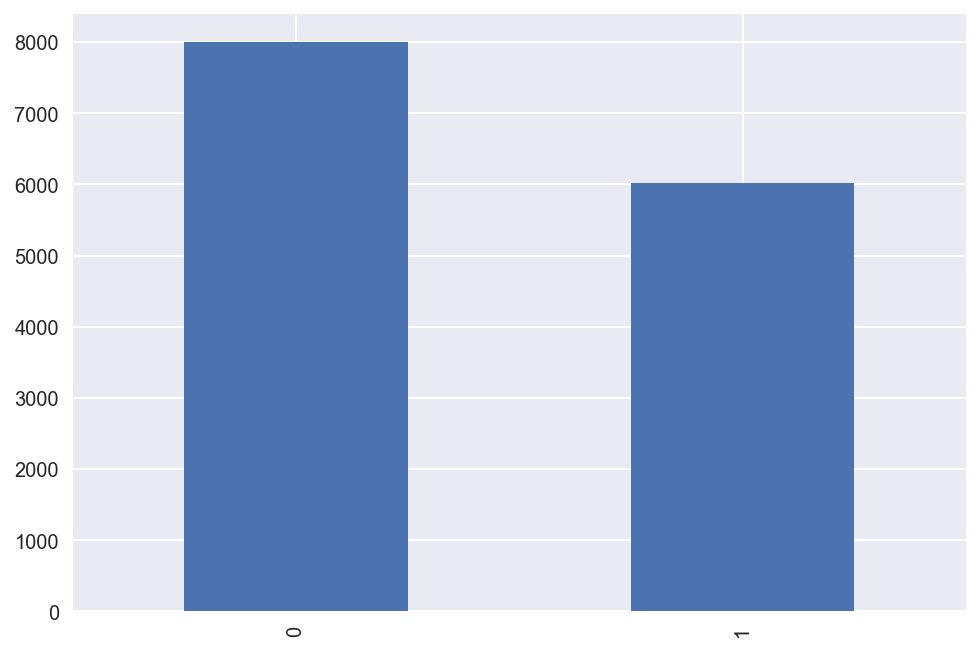

In [12]:
# use bar chart to see the TARGET
df['TARGET'].value_counts().plot.bar()

In [13]:
display_html_ratio_table(df['TARGET'])

name,count,ratio
0,8000,0.5708
1,6016,0.4292


It is binary response. I wil convert N to 0 and Y to 1, in the data preparation step.

<AxesSubplot:>

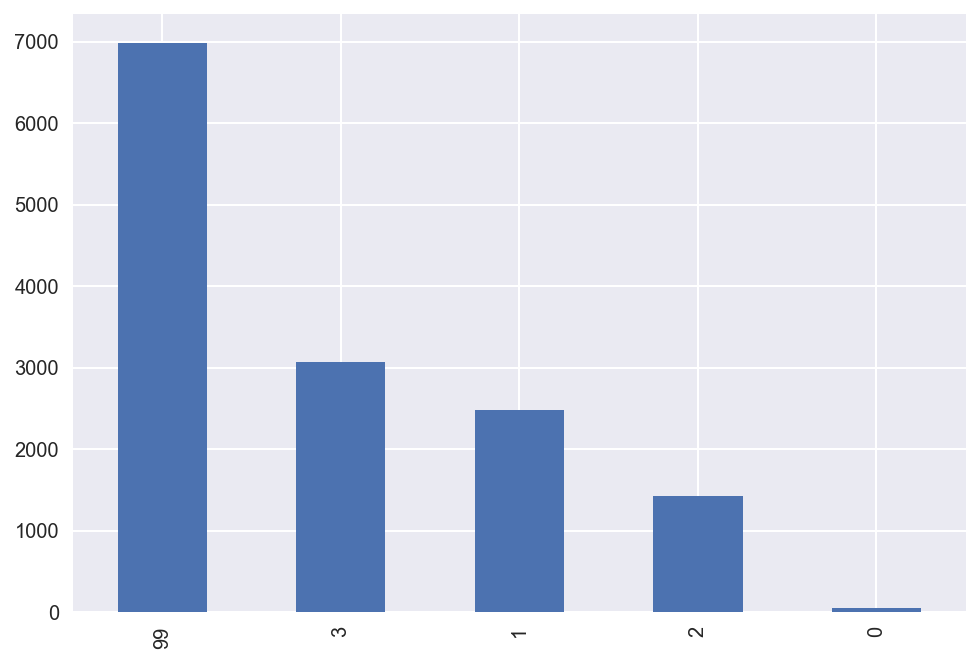

In [14]:
# use bar chart to see the loyalty
df['loyalty'].value_counts().plot.bar()

In [15]:
display_html_ratio_table(df['loyalty'])

name,count,ratio
99,6986,0.4984
3,3069,0.2190
1,2480,0.1769
2,1425,0.1017
0,56,0.0040


Loyalty level, from low to high (0 to 3), 99 = unclassified. The unclassified accounts for near 50%.

In [16]:
# ID is users' identification.
df['ID'].duplicated().sum()

3008

ID is users' identification. It should not be a explanary. I will drop it in data preparation.

In [17]:
# using histogram and boxplot to see the percentage variables
def hist_box(data_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(14, 6)
    axes[0].set_title("Histogram of " + col)
    sns.histplot(data_df[col], bins = 50, ax=axes[0])
    
    axes[1].set_title("Boxplot of " + col)
    sns.boxplot(y=data_df[col], orient="v",ax=axes[1])

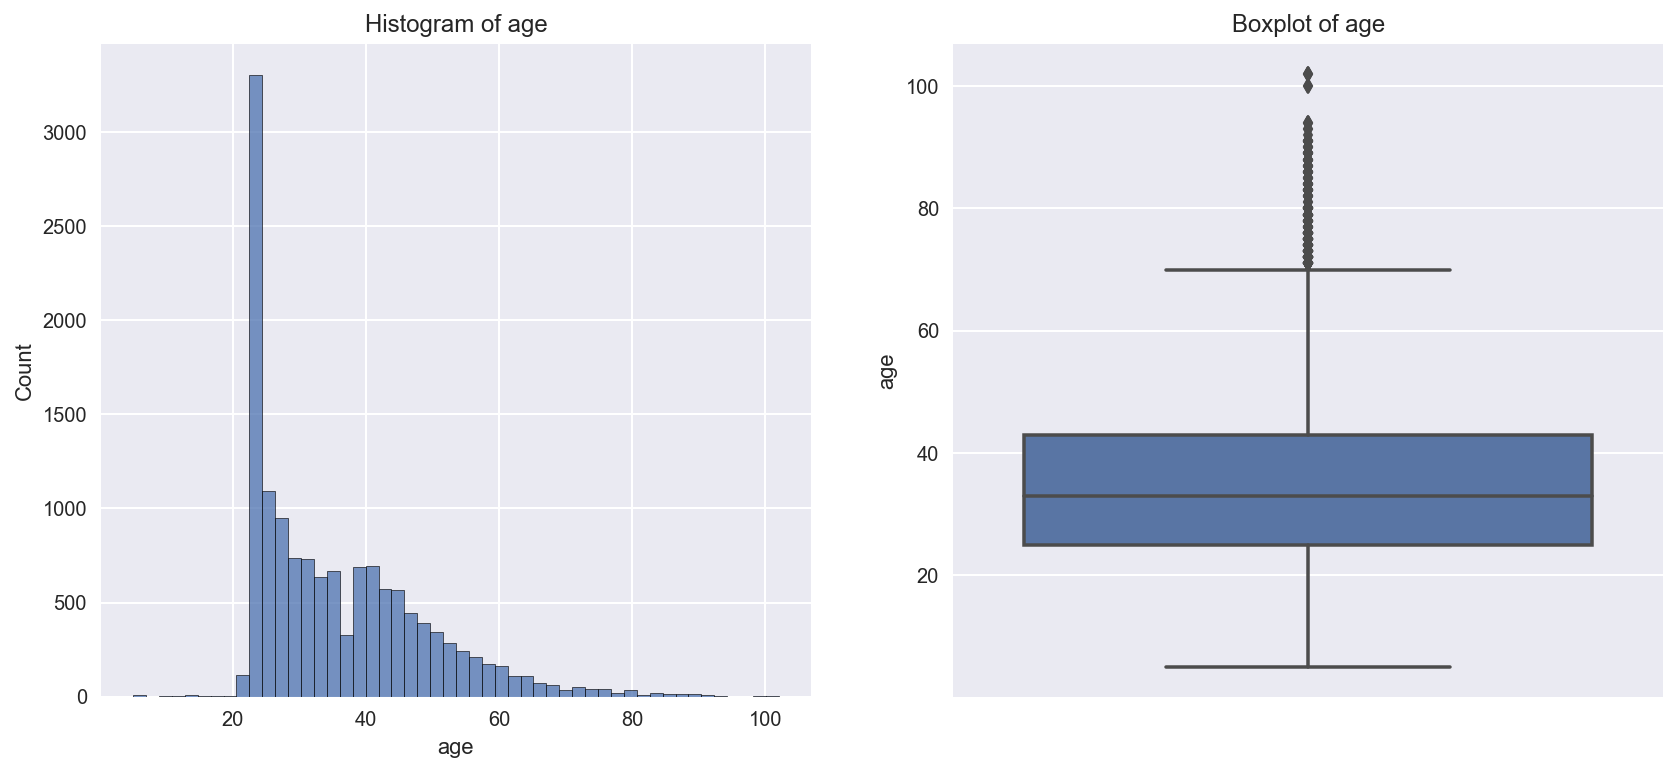

In [18]:
# using histogram and box plot to see the age
hist_box(df, 'age')

The age shows a right skewed distribution and it has many outliers.

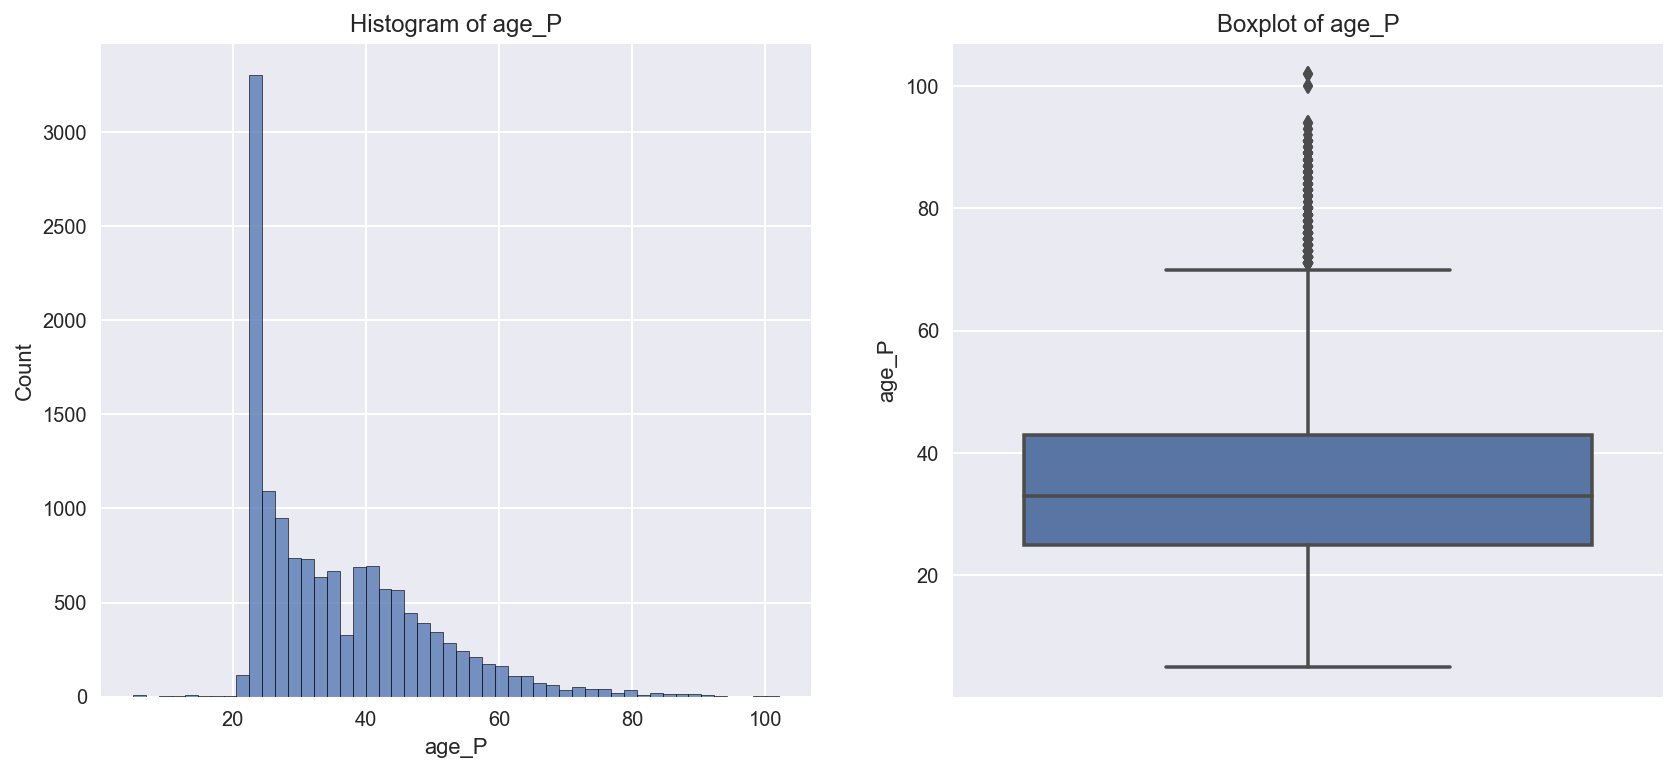

In [19]:
# age_P Age of partner in years
hist_box(df, 'age_P')

The age_P shows a right skewed distribution and it has many outliers.

In [20]:
# check multicollinearity
df[['age', 'age_P']].corr()

,age,age_P
age,1.0,1.0
age_P,1.0,1.0


age and age_P are present a same thing. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

<AxesSubplot:>

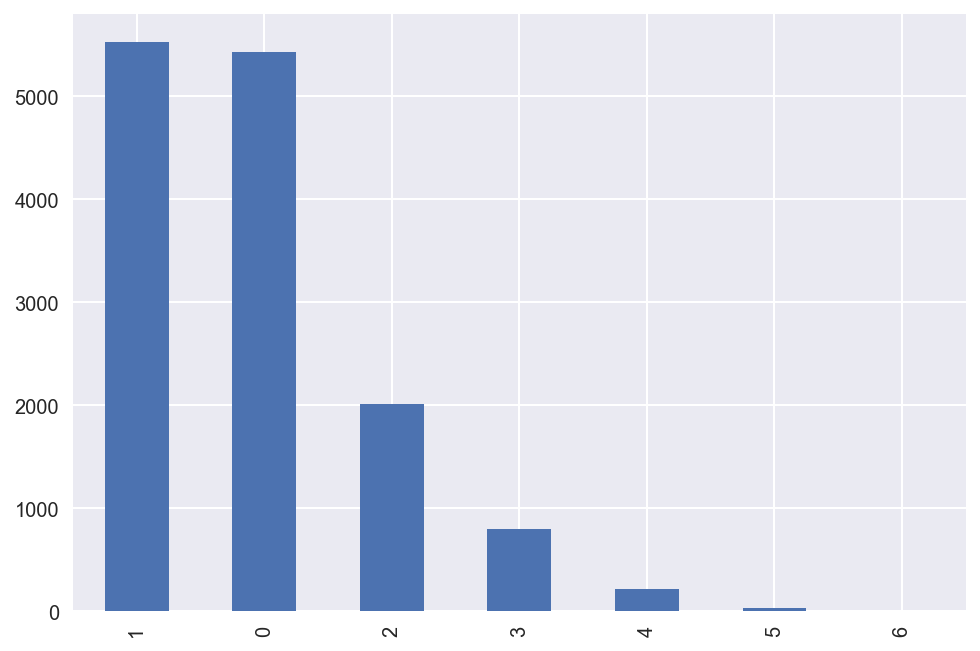

In [21]:
# LOR: Length of relationship in years
# using bar plot to see it
df['LOR'].value_counts().plot.bar()

The LOR (Length of relationship in years) concentrate from 0 to 2 years.

<AxesSubplot:>

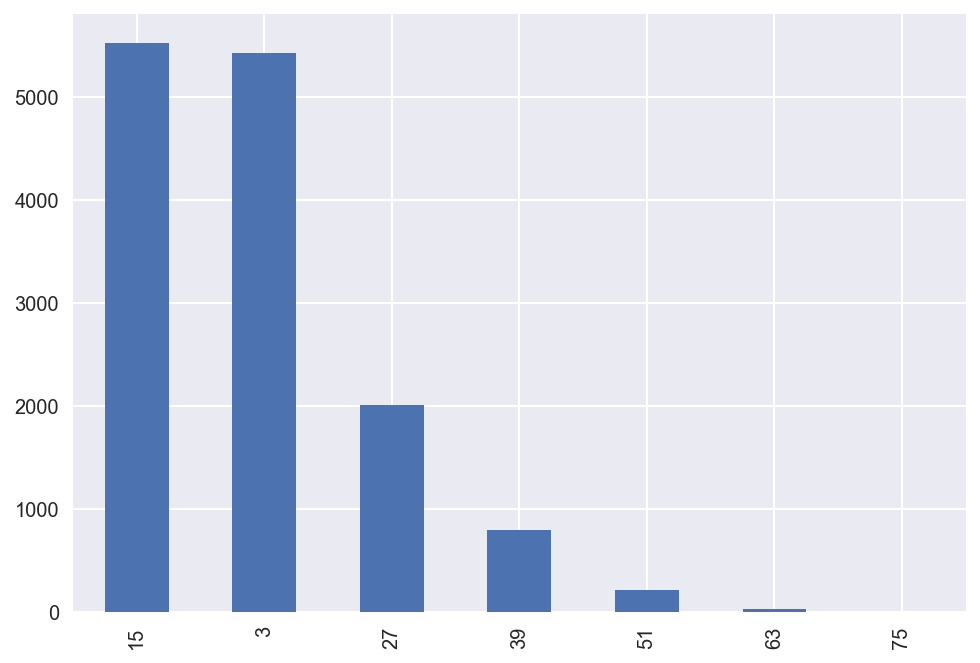

In [22]:
# lor_M Length of relationship in months
df['lor_M'].value_counts().plot.bar()

lor_M (Length of relationship in months) concentrate on 3 and 15 monthes.

In [23]:
df[['LOR', 'lor_M']].corr()

,LOR,lor_M
LOR,1.0,1.0
lor_M,1.0,1.0


LOR and lor_M are present a same thing. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

<AxesSubplot:>

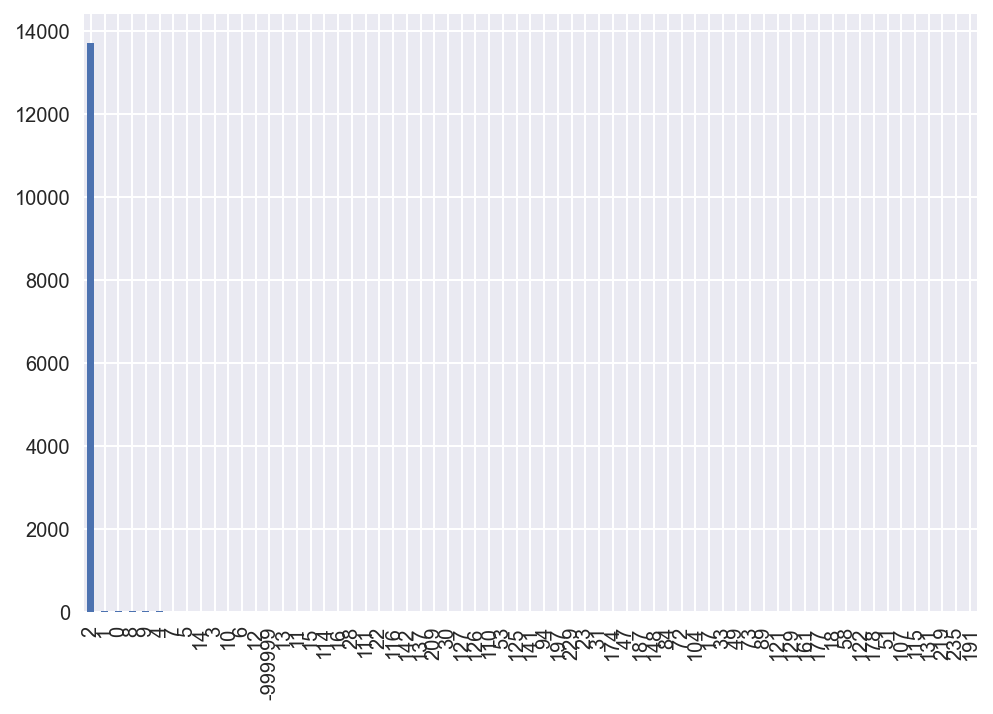

In [24]:
# use bar chart to see the city
df['city'].value_counts().plot.bar()

In [25]:
display_html_ratio_table(df['city'])

name,count,ratio
2,13720,0.9789
1,28,0.0020
0,26,0.0019
8,21,0.0015
9,20,0.0014
4,19,0.0014
7,15,0.0011
5,15,0.0011
14,13,0.0009
3,12,0.0009


The city 2 accounts for 97.89%. I'm going to merge the others into one type or drop them.

<AxesSubplot:>

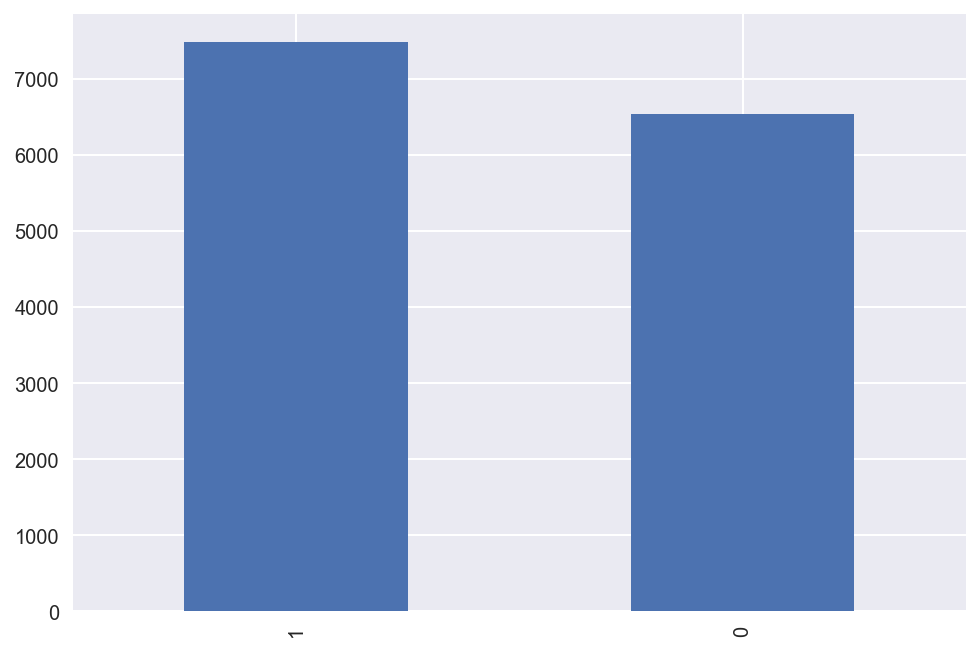

In [26]:
#prod_A Bought Product A (0=no, 1=yes)
# using bar plot to see prod_A
df['prod_A'].value_counts().plot.bar()

In [27]:
display_html_ratio_table(df['prod_A'])

name,count,ratio
1,7482,0.5338
0,6534,0.4662


Customers who buy product A and who do not buy prodcut A are 53.38% and 46.62% respectively

<AxesSubplot:>

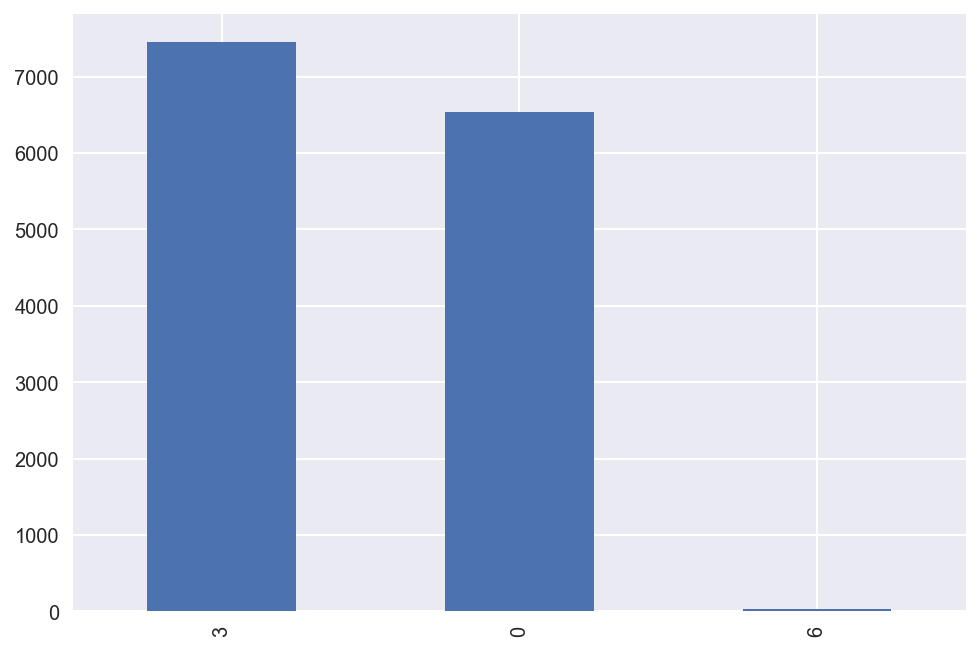

In [28]:
# type_A Type of product A
# using bar plot to see it
df['type_A'].value_counts().plot.bar()

In [29]:
display_html_ratio_table(df['type_A'])

name,count,ratio
3,7452,0.5317
0,6534,0.4662
6,30,0.0021


The percentage of 6 of Type A is very low.

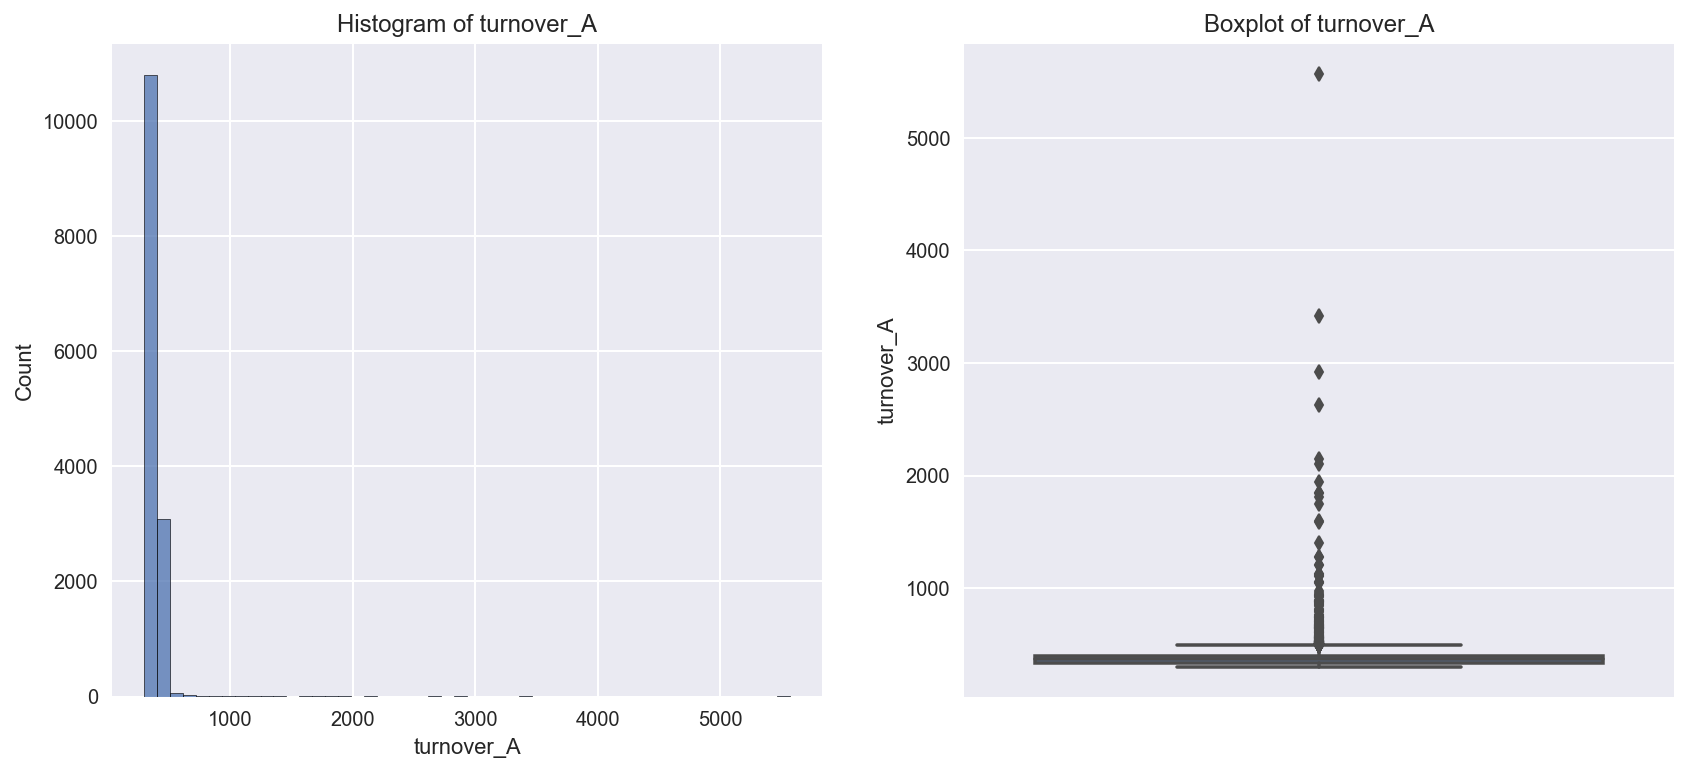

In [30]:
#turnover_A Amount of money spent on Product A
# using histogram and box plot to see it
hist_box(df, 'turnover_A')

In [31]:
df['turnover_A'].describe()

count    14016.000000
mean       379.161320
std         92.612207
min        300.095909
25%        334.919412
50%        367.891493
75%        399.744924
max       5568.784139
Name: turnover_A, dtype: float64

turnover_A shows right skewed distribution. 75% of data are lower than 399.74. It has many outliers.

<AxesSubplot:>

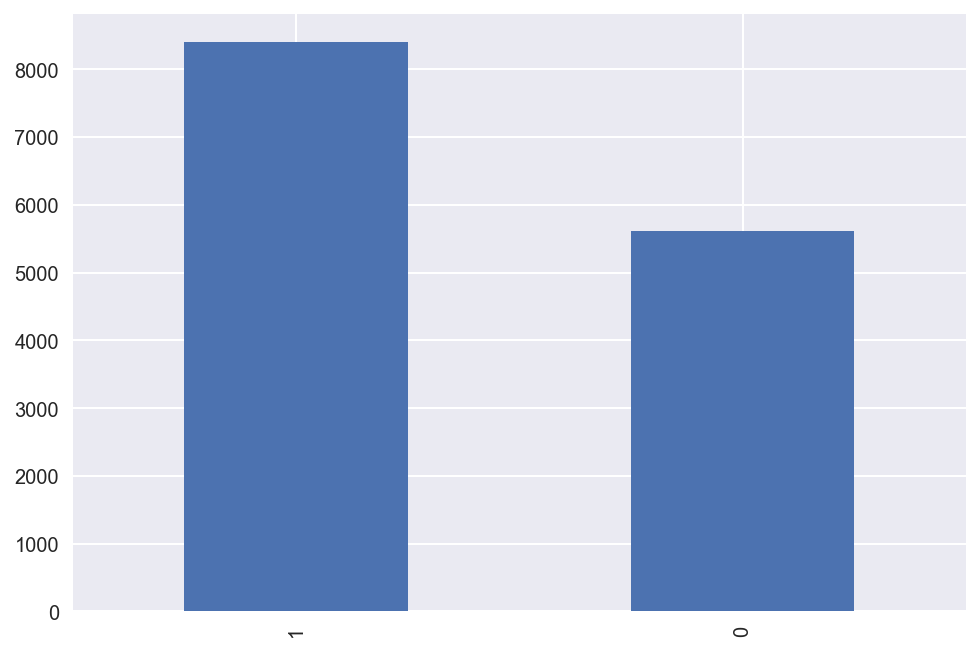

In [32]:
#prod_A Bought Product B (0=no, 1=yes)
# using bar plot to see prod_B
df['prod_B'].value_counts().plot.bar()

In [33]:
display_html_ratio_table(df['prod_B'])

name,count,ratio
1,8402,0.5995
0,5614,0.4005


Customers who buy product B and who do not buy prodcut B are 59.95% and 40.05% respectively

<AxesSubplot:>

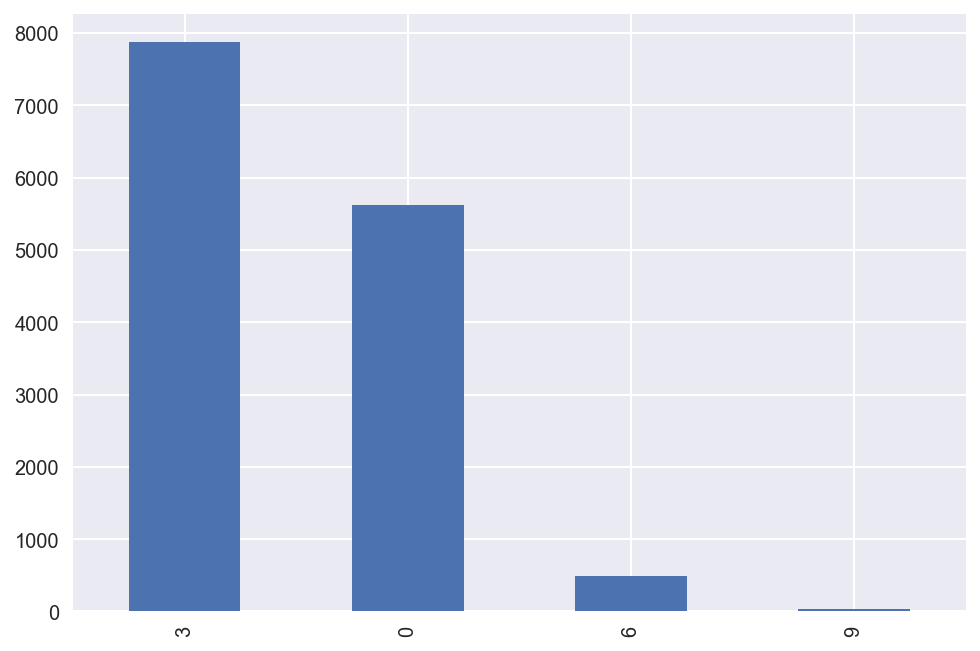

In [34]:
# type_B Type of product B
# using bar plot to see it
df['type_B'].value_counts().plot.bar()

In [35]:
display_html_ratio_table(df['type_B'])

name,count,ratio
3,7874,0.5618
0,5614,0.4005
6,493,0.0352
9,35,0.0025


The percentage of 6 and 9 of Type B is very low.

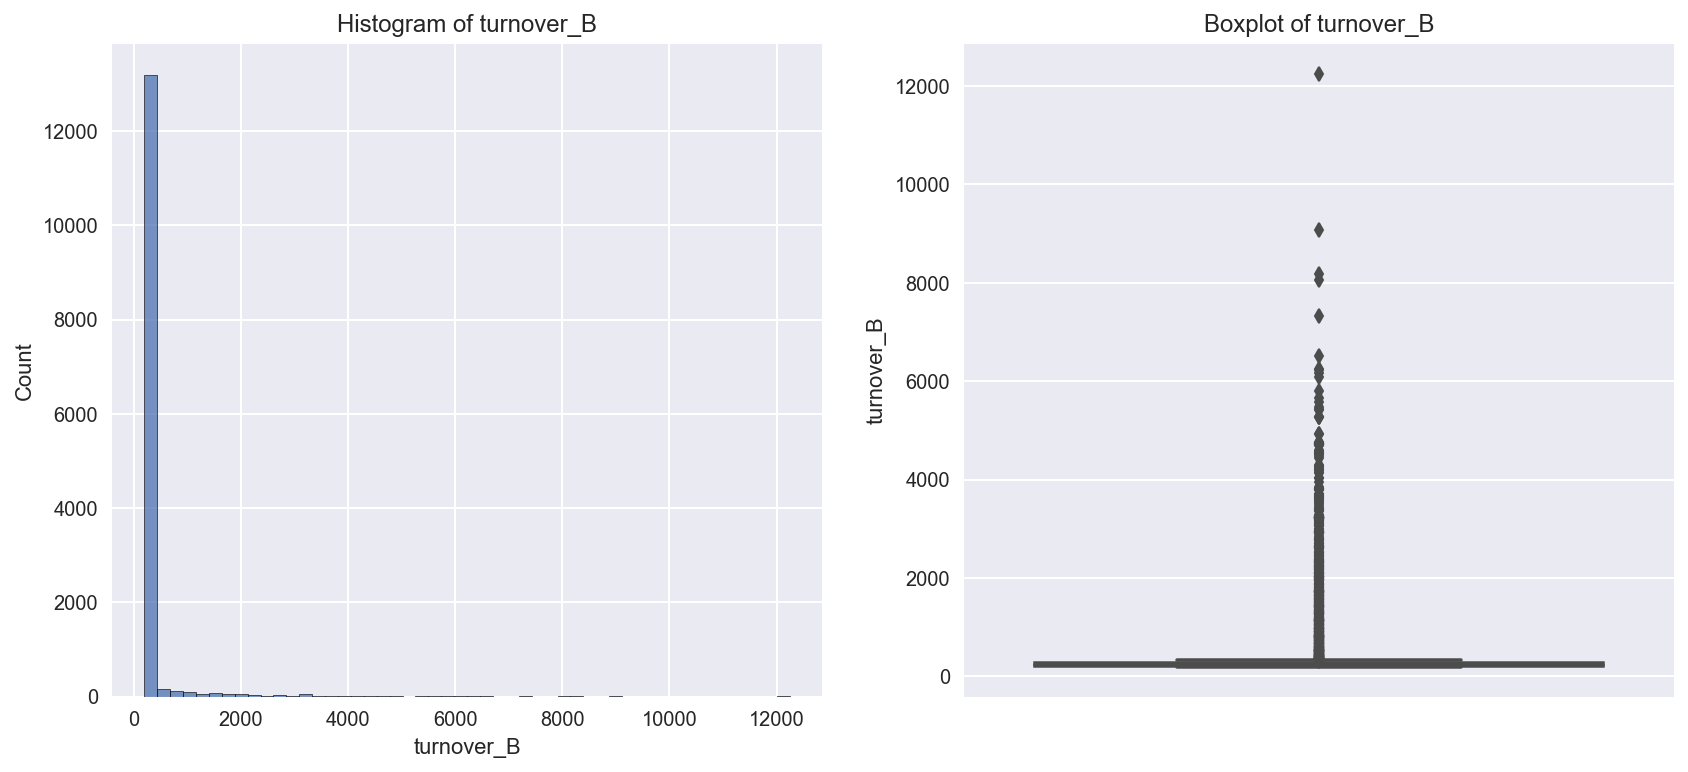

In [36]:
#turnover_A Amount of money spent on Product B
# using histogram and box plot to see it
hist_box(df, 'turnover_B')

In [37]:
df['turnover_B'].describe()

count    14016.000000
mean       328.628207
std        475.616525
min        191.962852
25%        219.406925
50%        237.656757
75%        264.131538
max      12249.084770
Name: turnover_B, dtype: float64

turnover_B shows right skewed distribution. 75% of data are lower than 264.13. It has many outliers.

<AxesSubplot:>

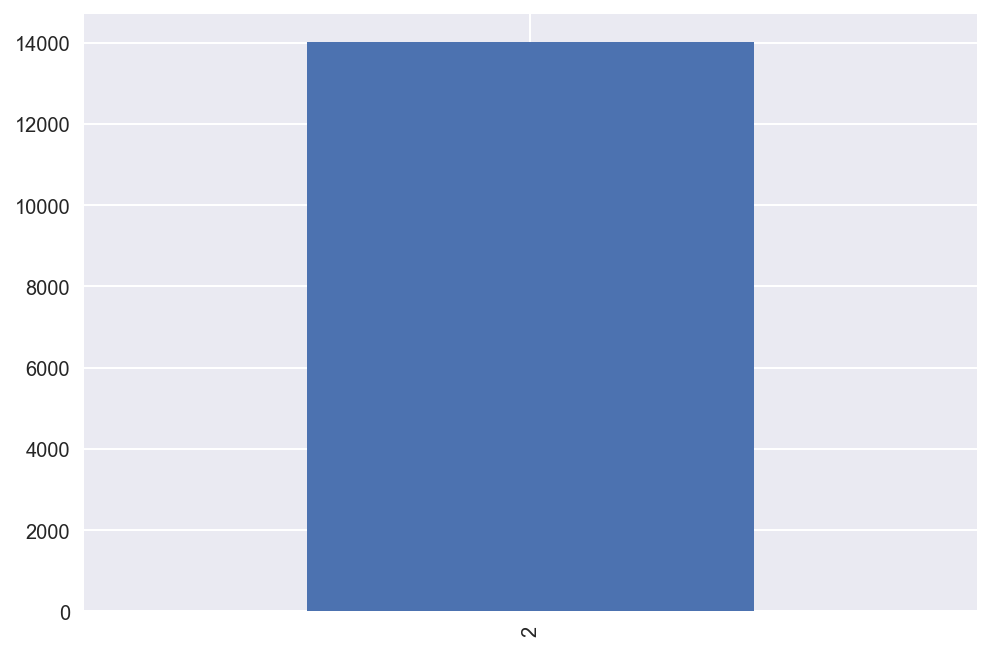

In [38]:
# contract Type of contract
# using bar plot to see it
df['contract'].value_counts().plot.bar()

In [39]:
display_html_ratio_table(df['contract'])

name,count,ratio
2,14016,1.0000


contract has only one value. It can be ignored. I will drop it in the data preparation.

#### heatmap checks correlation and multicollinearity

y = dependent variable (TARGET)

<AxesSubplot:>

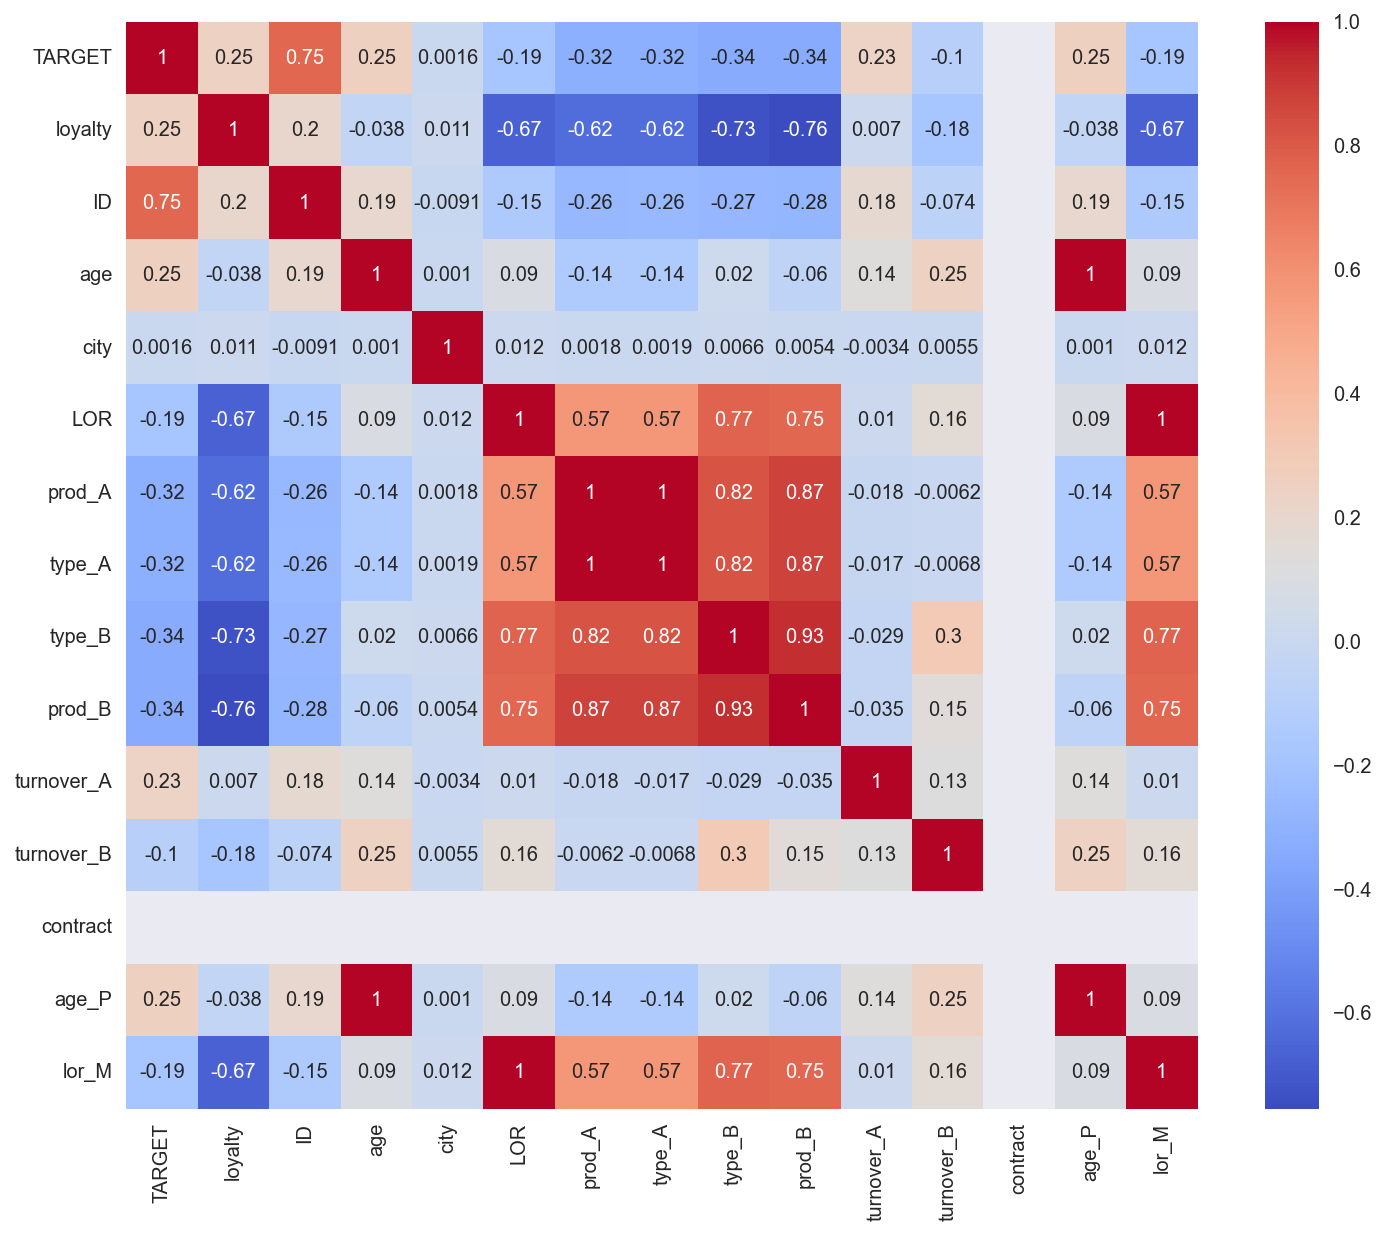

In [40]:
cm = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap='coolwarm')

LOR and lor_M have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

age and age_P have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

prod_A and type_A have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.

### Summary

Variables need to be converted:

- Target： It is binary response. I wil convert N to 0 and Y to 1, in the data preparation step.


Variables need to be dropped:

- LOR and lor_M have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- age and age_P have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- prod_A and type_A have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- ID is users' identification. It should not be a explanary. I will drop it in data preparation.
- contract has only one value. It can be ignored. I will drop it in the data preparation.


Values of variable need to be merged:

- The city 2 accounts for 97.89%. I'm going to merge the others into one type.


Numerical variabels:

- The age shows a right skewed distribution and it has many outliers.
- turnover_A shows right skewed distribution. It has many outliers.
- turnover_B shows right skewed distribution. It has many outliers.


Categorical variabels: They need to convert to object type.

- loyalty
- city
- lor_M
- prod_A Bought Product A (0=no, 1=yes)
- type_A Type of product A
- type_B Type of product B
- prod_B Bought Product B (0=no, 1=yes)


# 4. Data Preparation
Select sub set without useless variables.
Check duplicate
Convert data to valid values
Convert data type
Drop outliers

### Check duplications

In [41]:
# To check whether there are duplicated rows in the data set
dup_rows = df.duplicated( keep='first')

dup_rows.value_counts()

False    11008
True      3008
dtype: int64

The data set has 3008 duplicated rows. Next I will explore these duplicates.

In [42]:
# fetch and show the duplicates
duplicates_df = df[dup_rows]

print(duplicates_df.shape)
duplicates_df.head(3)

(3008, 15)


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
11008,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
11009,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
11010,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27


In [43]:
# see duplicates by duplicated ID
df[(df['ID'] == 77)] 

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.72101,2,66,3
11008,1,99,77,66,2,0,0,0,0,0,333.561114,264.72101,2,66,3


In [44]:
# see duplicates by duplicated ID
df[(df['ID'] == 220)] 

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
2,1,1,220,42,2,2,1,3,6,1,342.18099,1175.589721,2,42,27
11010,1,1,220,42,2,2,1,3,6,1,342.18099,1175.589721,2,42,27


#### Drop these duplicates

Drop the last duplicate, keep the first one.

In [45]:
no_duplicates_df = df.drop_duplicates(keep='first', inplace=False)

In [46]:
no_duplicates_df.shape

(11008, 15)

### Select sub set without useless variables.

In the new sub set, followed variables will be removed.

- LOR and lor_M have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- age and age_P have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- prod_A and type_A have correlation with 1. It is multicollinearity. If I use Logistic Regression, one of them will be dropped.
- ID: IT is users' identification. It should not be a explanary. I will drop it in data preparation.
- contract: It has only one value. It can be ignored. I will drop it in the data preparation.

In [47]:
is_df = no_duplicates_df[['TARGET', 'loyalty', 'age', 'city', 'prod_A',
       'type_B', 'prod_B', 'turnover_A', 'turnover_B',
       'lor_M']].copy()

print(is_df.shape)
is_df.head(5)

(11008, 10)


,TARGET,loyalty,age,city,prod_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,66,2,0,0,0,333.561114,264.721010,3
1,1,1,45,2,1,3,1,394.735699,284.904978,39
2,1,1,42,2,1,6,1,342.180990,1175.589721,27
3,1,99,31,2,0,0,0,453.757916,242.341754,3
4,1,99,62,2,0,0,0,384.577469,287.008370,3


<AxesSubplot:>

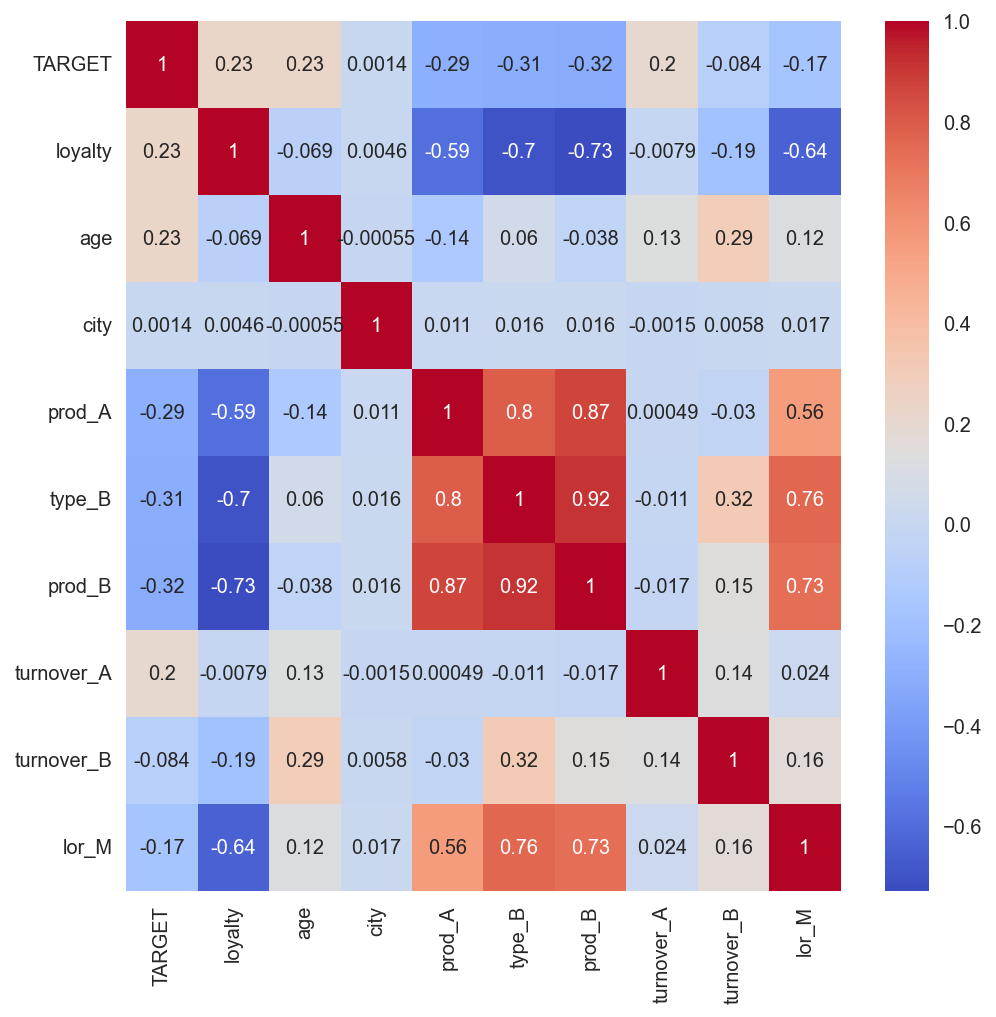

In [48]:
# check the multicollinearity for new data set
cm = is_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm')

### Convert data to valid values

city: The city 2 accounts for 97.89%. I'm going to merge the others into one type.

In [49]:
is_df['city'] = is_df['city'].apply(lambda x: 'c_2' if x == 2 else 'other')

In [50]:
is_df['city'].value_counts()

c_2      10769
other      239
Name: city, dtype: int64

### Convert data type

In [51]:
cat_cols = ['loyalty', 'city', 'lor_M', 'prod_A', 'type_B', 'prod_B']
for col in cat_cols:
    is_df[col] = is_df[col].astype("category")

In [52]:
is_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11008 entries, 0 to 11007
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TARGET      11008 non-null  int32   
 1   loyalty     11008 non-null  category
 2   age         11008 non-null  int64   
 3   city        11008 non-null  category
 4   prod_A      11008 non-null  category
 5   type_B      11008 non-null  category
 6   prod_B      11008 non-null  category
 7   turnover_A  11008 non-null  float64 
 8   turnover_B  11008 non-null  float64 
 9   lor_M       11008 non-null  category
dtypes: category(6), float64(2), int32(1), int64(1)
memory usage: 452.6 KB


### Drop outliers

In [53]:
def two_box_compare(ori_df, now_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Original data ")
    sns.boxplot(y=ori_df[col], orient="v",ax=axes[0])
    
    axes[1].set_title("New data ")
    sns.boxplot(y=now_df[col], orient="v",ax=axes[1])

def statistic_compare(data_1, data_2, cols):
    for col in cols:
        mean1 = data_1[col].mean()
        std1 = data_1[col].std()
        
        mean2 = data_2[col].mean()
        std2 = data_2[col].std()
        
        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100
        
        print("%s :\n the mean decreased from %.2f to %.2f , the mean value has decreased by more than %.2f %% .\n the standard deviation decreased from %.2f to %.2f the standard deviation value has decreased by more than %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))

def drop_outliers(data_df, cols, sigema = 3.0):
    del_arr = []
    for col in cols:
        del_outliers = data_df[np.abs(data_df[col] - data_df[col].mean() ) > (sigema * data_df[col].std() )]
        
        #Q1 = data_df[col].quantile(0.25)
        #Q3 = data_df[col].quantile(0.75)
        #IQR = Q3 - Q1

        # Creating notinvalidarea dataframe with boolean values:
        # False means these values are into the valid area 
        # True indicates presence of an outlier
        #notinvalidarea = (onlinenews < (Q1 - 1.5 * IQR)) | (onlinenews > (Q3 + 1.5 * IQR))
        
        #del_outliers = data_df[(data_df[col] < (Q1 - sigema * IQR)) | (data_df[col] > (Q3 + sigema * IQR)) ]

        del_arr.append(del_outliers)
        
        
    del_df = pd.concat(del_arr)
    
    del_df.drop_duplicates(keep='first', inplace=True)
    print("There are %d outliers that account for %.2f %%. They all large than (%.1f * std + mean) of column." 
          %(del_df.shape[0], (del_df.shape[0] / data_df.shape[0]) * 100, sigema))
    
    return del_df


from IPython.display import HTML, display
def display_html_statistic_table(ori, now, title1="1st", title2="2nd",col=""):
    

        
    html = "<table>"
    html += "<tr><td>%s</td><td>%s</td><td>%s</td></tr>" %(col, title1, title2)
    html += "<tr><td>%s</td><td>%d</td><td>%d</td></tr>" %('count', ori[col].shape[0], now[col].shape[0])
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('mean', ori[col].mean(), now[col].mean())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('std', ori[col].std(), now[col].std())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('min', ori[col].min(), now[col].min())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('25%', ori[col].quantile(0.25), now[col].quantile(0.25))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('50%', ori[col].quantile(0.50), now[col].quantile(0.50))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('75%', ori[col].quantile(0.75), now[col].quantile(0.75))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('max', ori[col].max(), now[col].max())

    html += "</table>"
    display(HTML(html))

#### check all outliers of numeric variables

In [54]:
num_cols = ['turnover_A', 'turnover_B', 'age']

In [55]:
# Getting outliers that larger than (mean + 3 * std).
del_3_sigema_outliers_df = drop_outliers(is_df, num_cols, 3.0)

There are 427 outliers that account for 3.88 %. They all large than (3.0 * std + mean) of column.


In [56]:
# copy a data set to test
del_test_df_3_sigema = is_df.copy()

In [57]:
# drop outliers
del_test_df_3_sigema.drop(del_3_sigema_outliers_df.index.values, inplace=True)

In [58]:
del_test_df_3_sigema.shape

(10581, 10)

In [59]:
# orginal data set
is_df.corr()

,TARGET,age,turnover_A,turnover_B
TARGET,1.000000,0.227510,0.201813,-0.084418
age,0.227510,1.000000,0.130944,0.293546
turnover_A,0.201813,0.130944,1.000000,0.138260
turnover_B,-0.084418,0.293546,0.138260,1.000000


In [60]:
# without outliers data set
corr_matrix_3_sigema = del_test_df_3_sigema.corr()
corr_matrix_3_sigema

,TARGET,age,turnover_A,turnover_B
TARGET,1.000000,0.285645,0.438832,-0.043046
age,0.285645,1.000000,0.191498,0.242189
turnover_A,0.438832,0.191498,1.000000,0.027238
turnover_B,-0.043046,0.242189,0.027238,1.000000


The above correlation tables show that the correlation increase for data set without outliers.

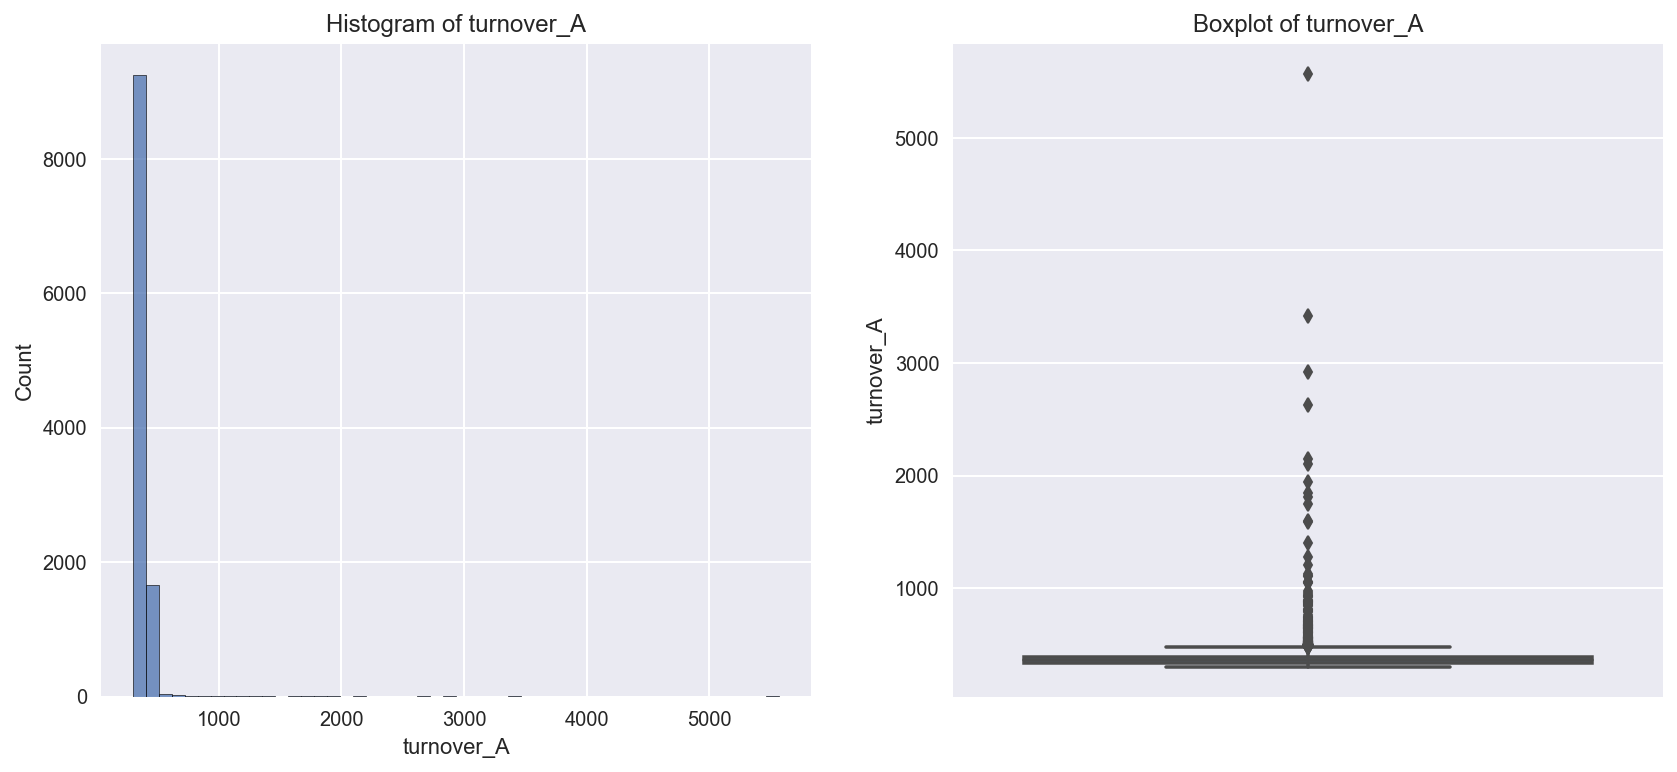

In [61]:
# Original data set with outliers
hist_box(is_df, 'turnover_A')

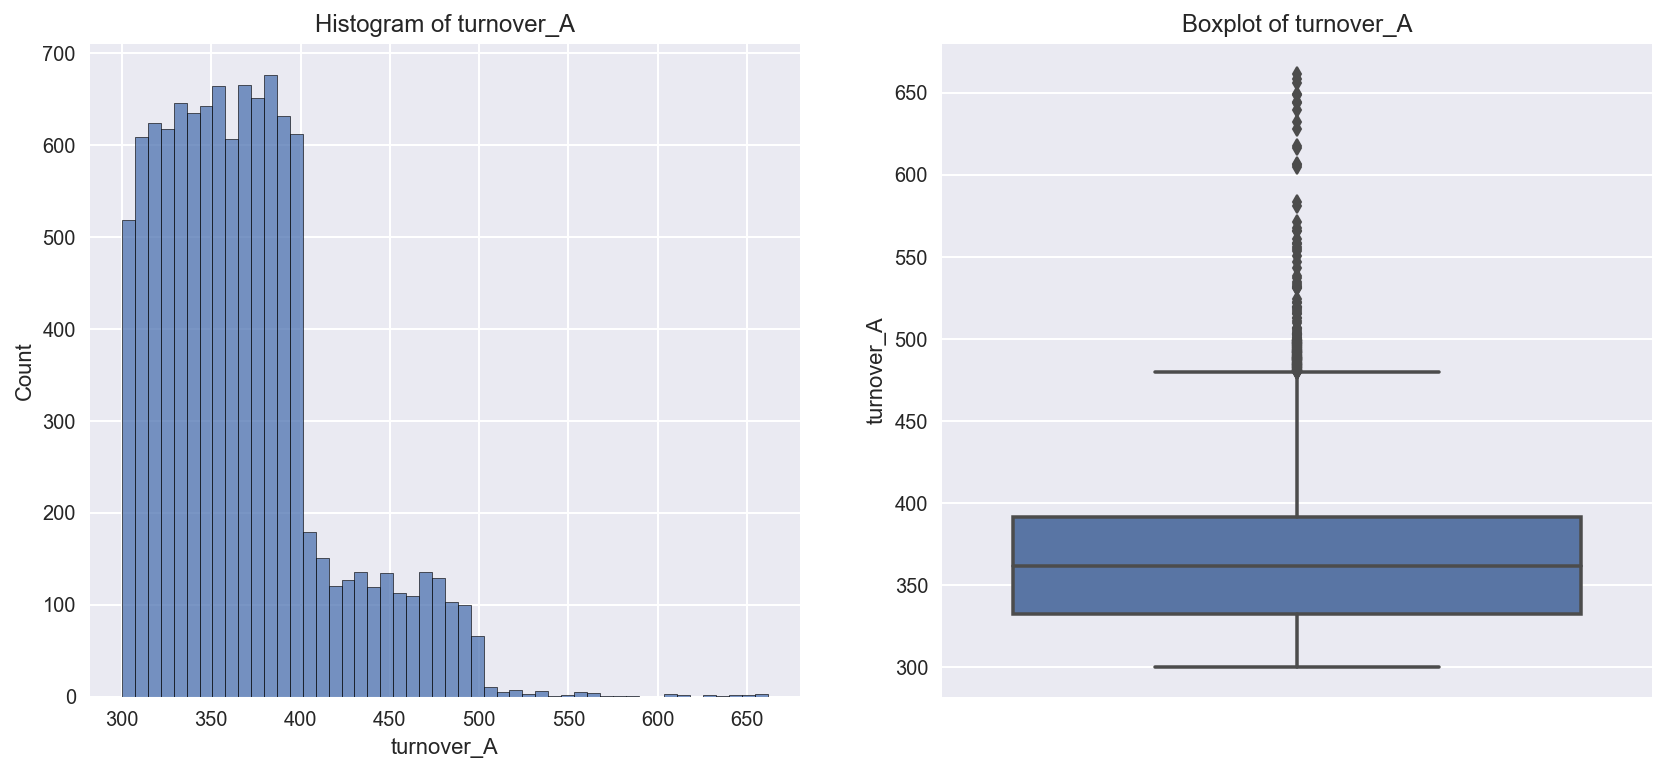

In [62]:
# data set with outliers
hist_box(del_test_df_3_sigema, 'turnover_A')

The above histograms and box plots show that turnover_A without outliers become more concentration. The max value dorpped from near 6000 to around 1800.

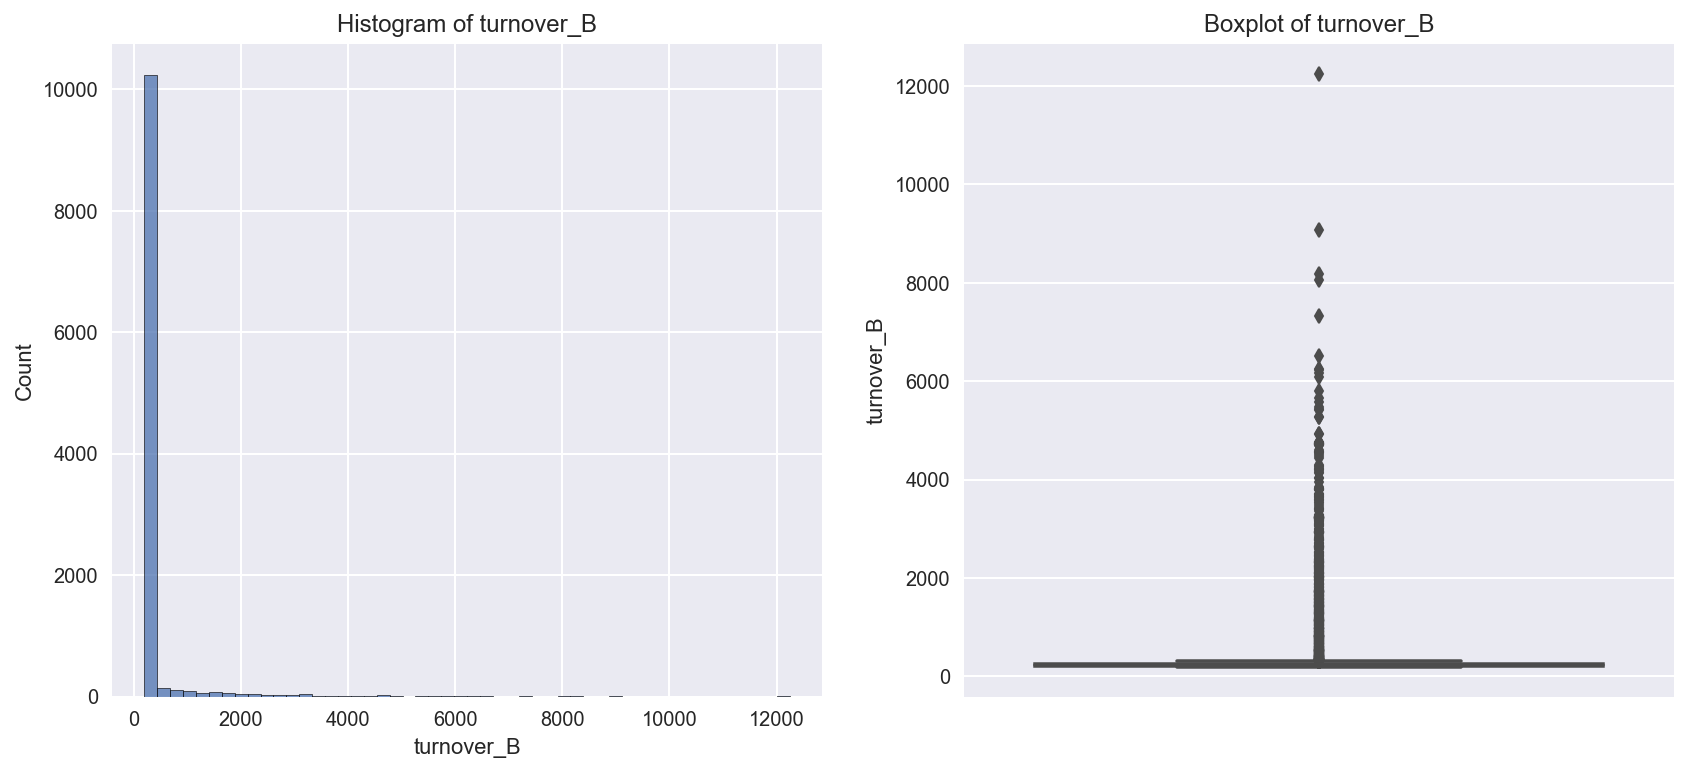

In [63]:
# Original data set with outliers
hist_box(is_df, 'turnover_B')

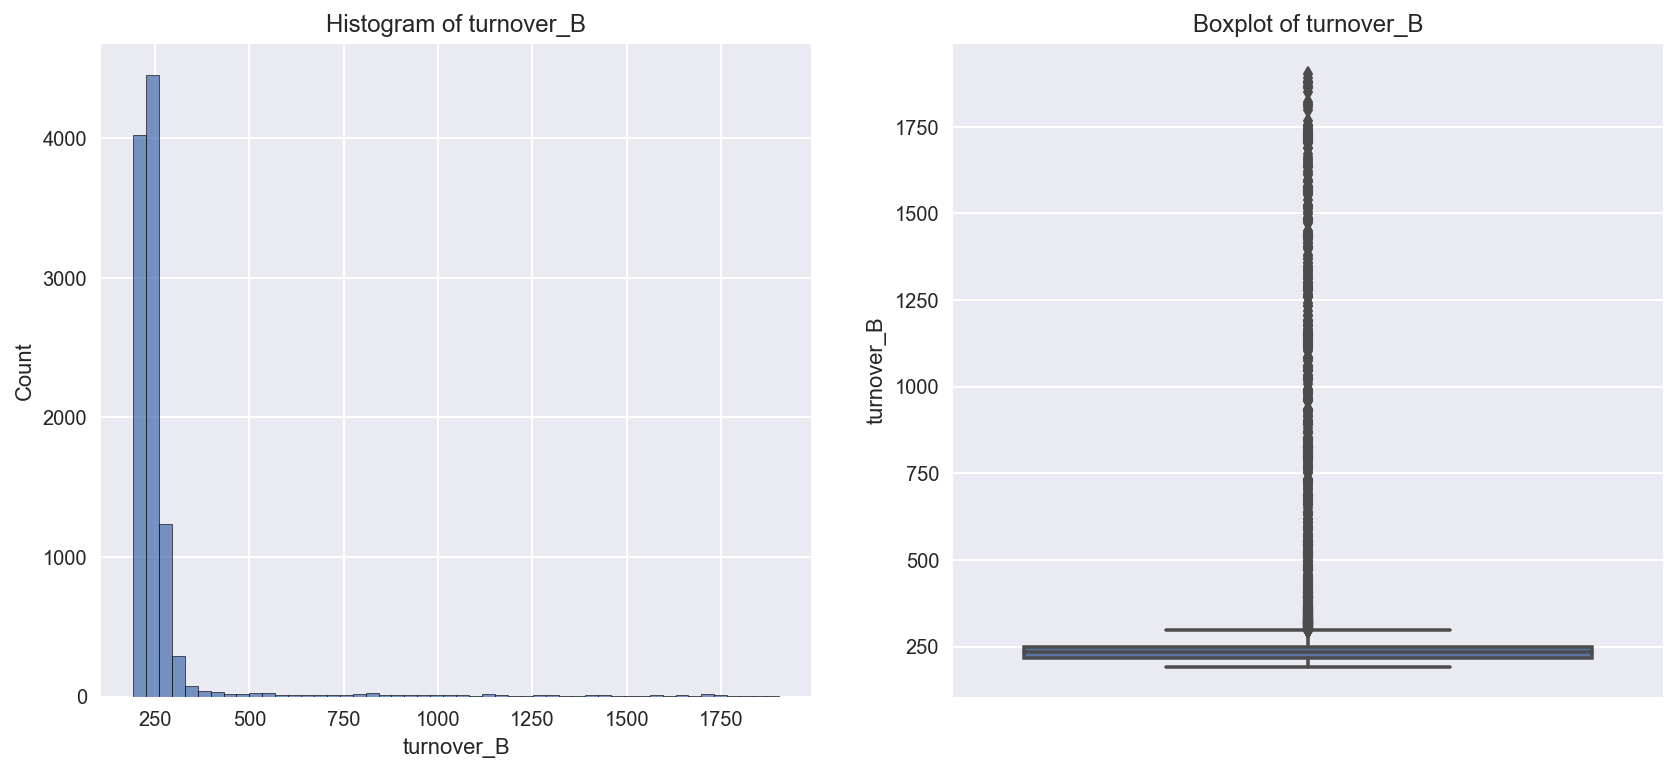

In [64]:
# data set with outliers
hist_box(del_test_df_3_sigema, 'turnover_B')

The above histograms and box plots show that turnover_B without outliers become more concentration. The max value dorpped from around 12000 to around 5000.

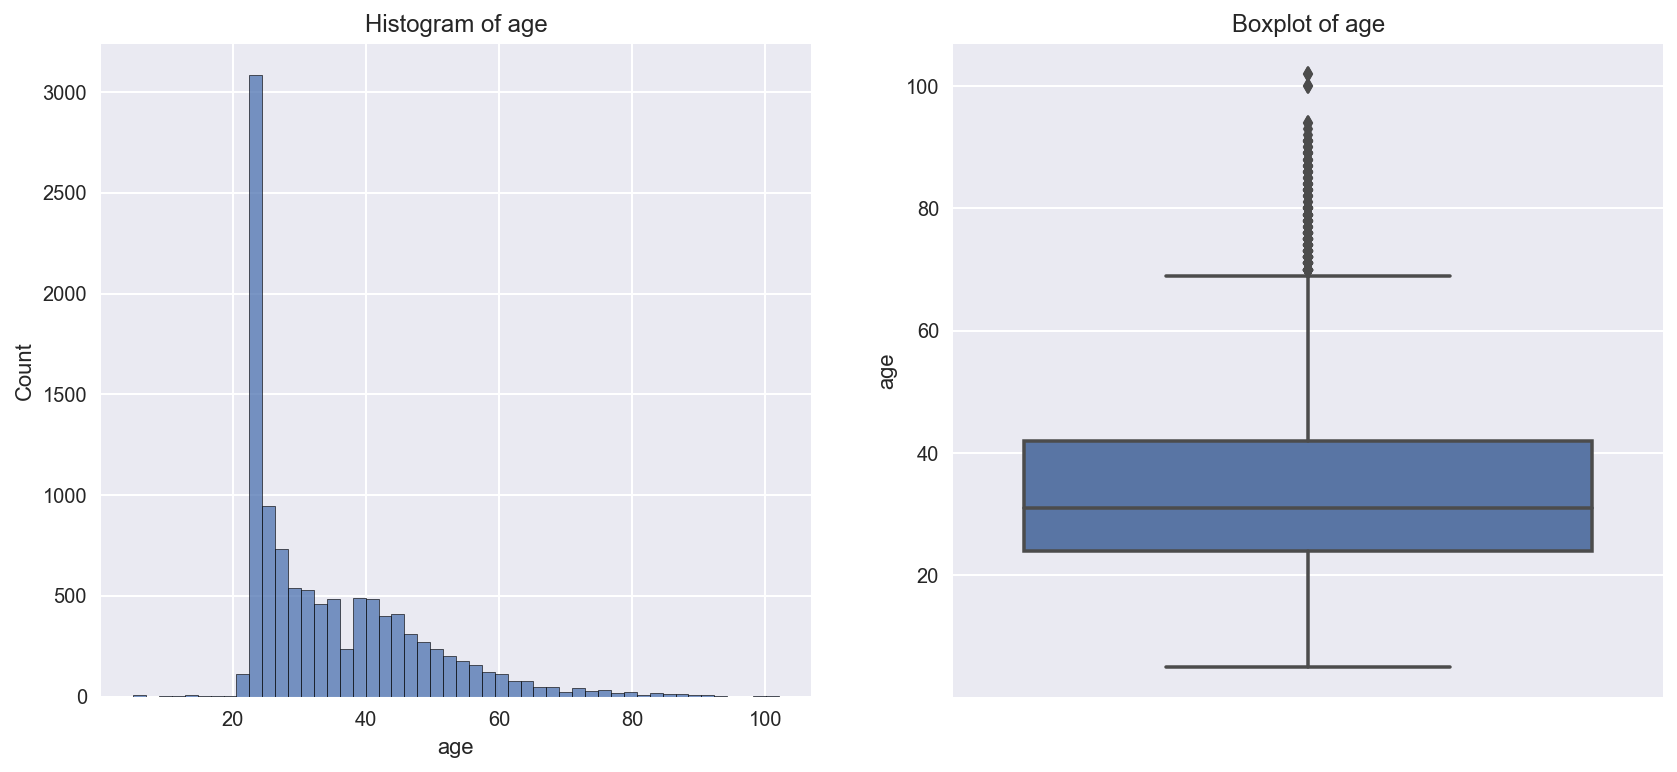

In [65]:
# Original data set with outliers
hist_box(is_df, 'age')

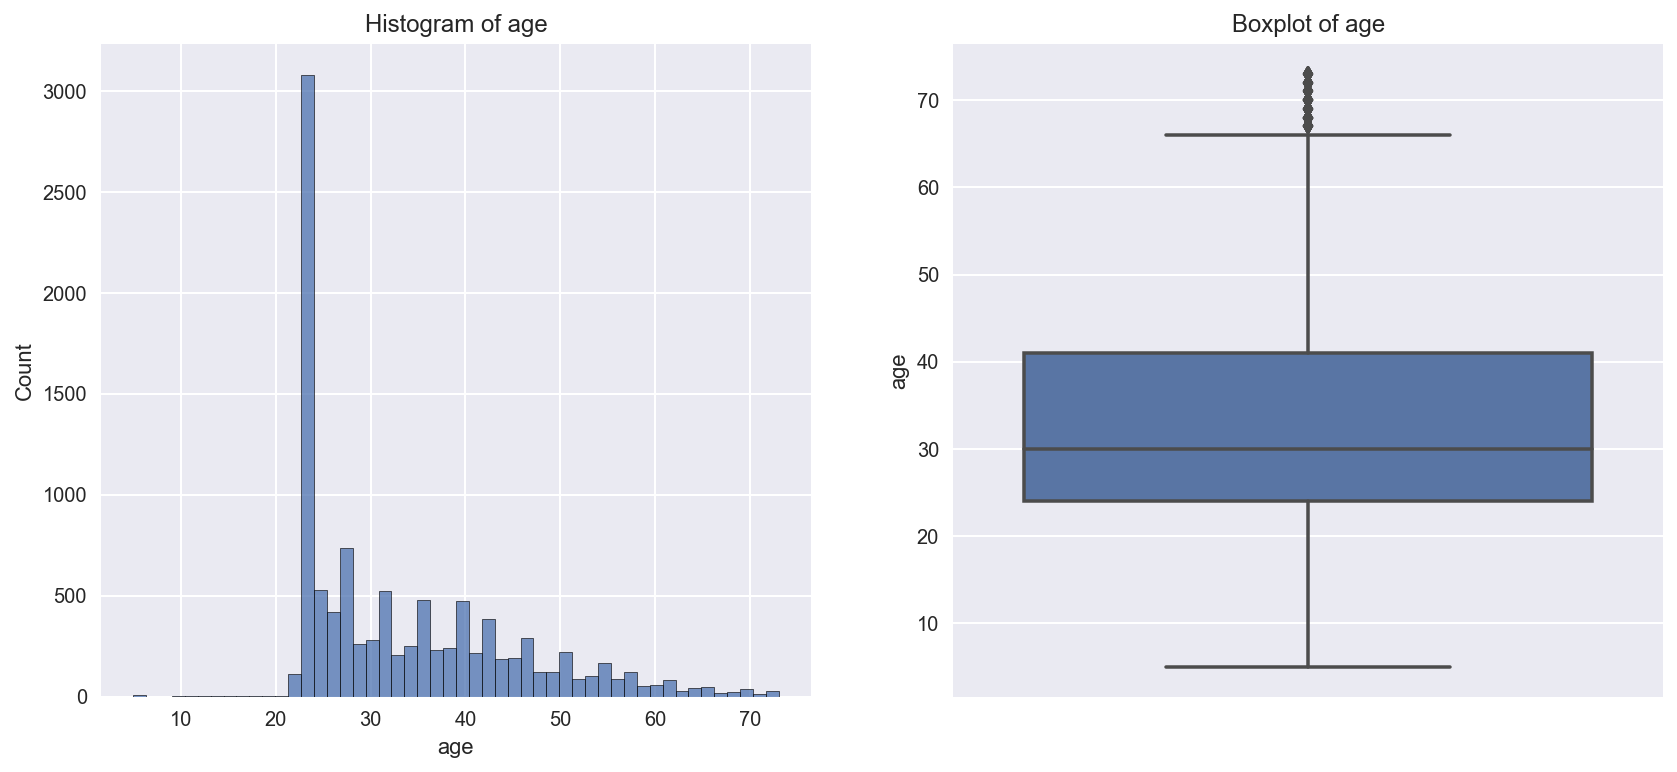

In [66]:
# data set with outliers
hist_box(del_test_df_3_sigema, 'age')

In [67]:
display_html_statistic_table(is_df, del_test_df_3_sigema, title1="with outliers",
                             title2 = "droped outliers", col="age")

age,with outliers,droped outliers
count,11008,10581
mean,34.8452,33.7636
std,13.0328,11.5492
min,5.0000,5.0000
25%,24.0000,24.0000
50%,31.0000,30.0000
75%,42.0000,41.0000
max,102.0000,73.0000


The above histograms, box plots, and description table show that age without outliers does not have obviously change.

#### I will drop outliers with (mean + 3 * std)

In [68]:
prepared_is_df = del_test_df_3_sigema.copy()
prepared_is_df.shape

(10581, 10)

# 5. Prepped Data Review (Re-run Exploratory Data Analysis)

In [69]:
prepared_is_df.describe()

,TARGET,age,turnover_A,turnover_B
count,10581.000000,10581.000000,10581.000000,10581.000000
mean,0.278707,33.763633,368.306876,270.482339
std,0.448384,11.549245,47.758777,182.288194
min,0.000000,5.000000,300.095909,191.962852
25%,0.000000,24.000000,332.308383,217.797477
50%,0.000000,30.000000,361.847794,233.988114
75%,1.000000,41.000000,391.373448,249.741496
max,1.000000,73.000000,661.507779,1902.773378


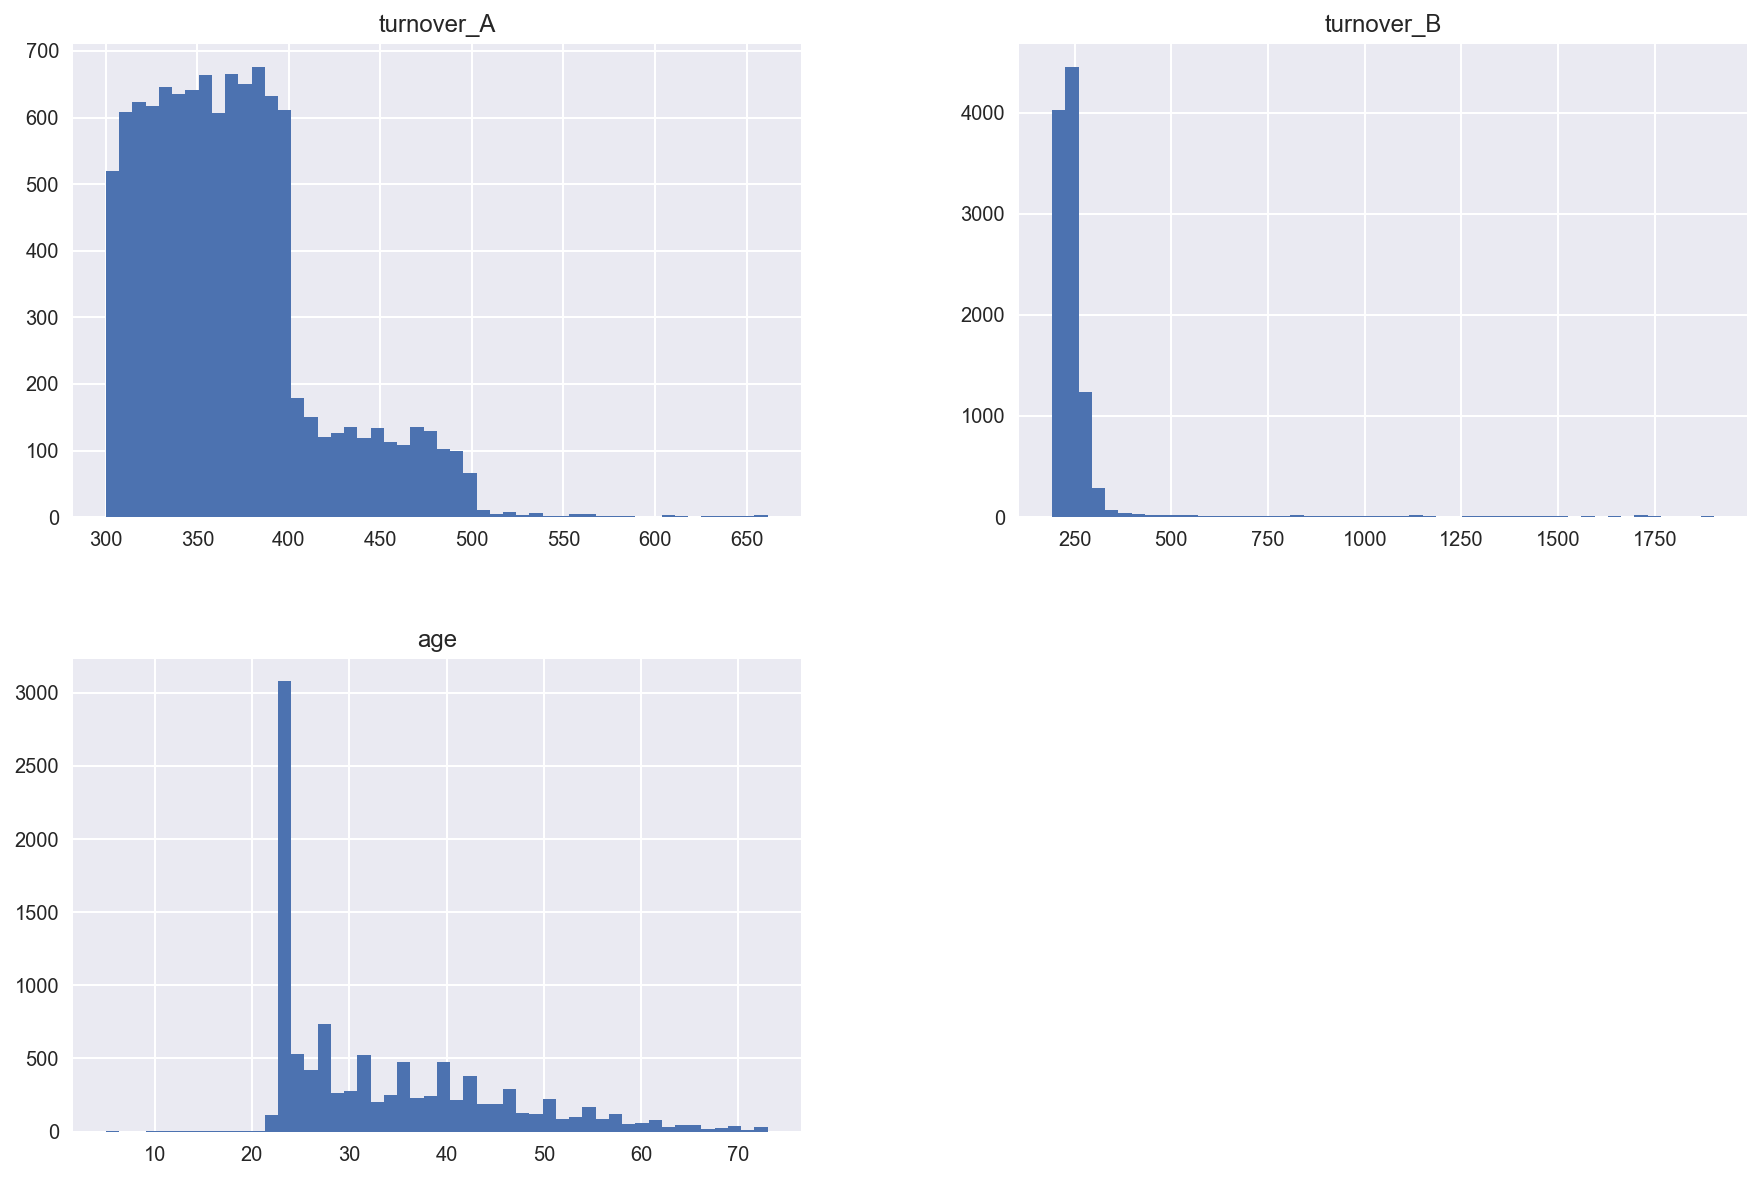

In [70]:
# draw the histogram for count variables
prepared_is_df[num_cols].hist(bins=50, figsize=(15,10))
plt.show()

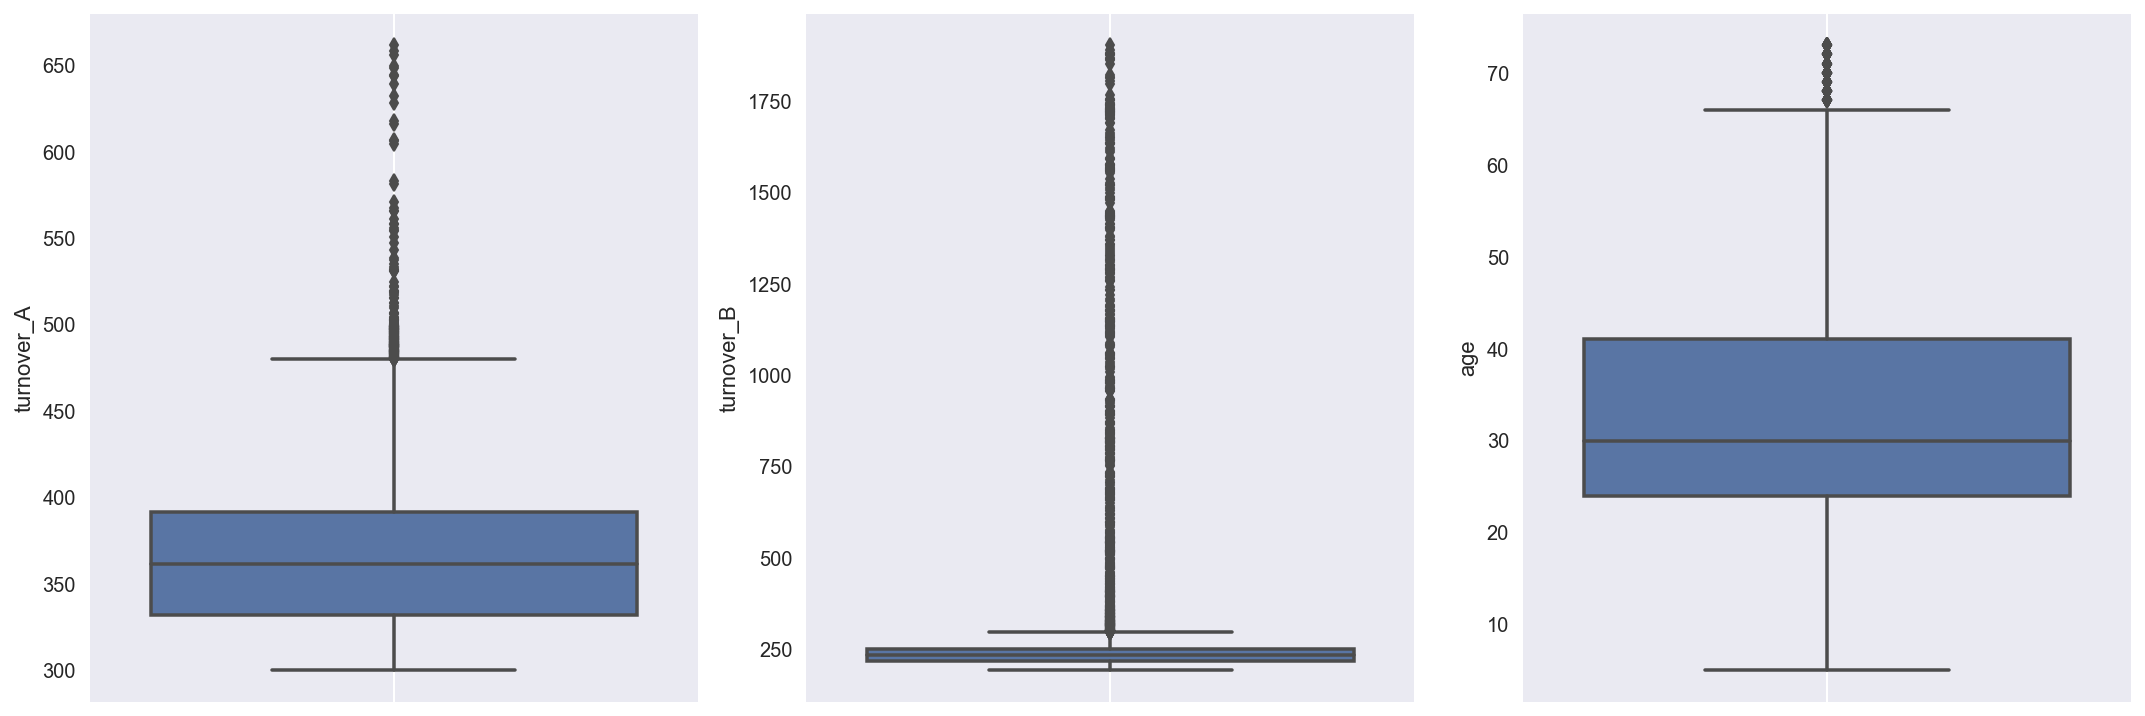

In [71]:
# Draw the box plots for count variables
plt.figure(figsize = (15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=prepared_is_df,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

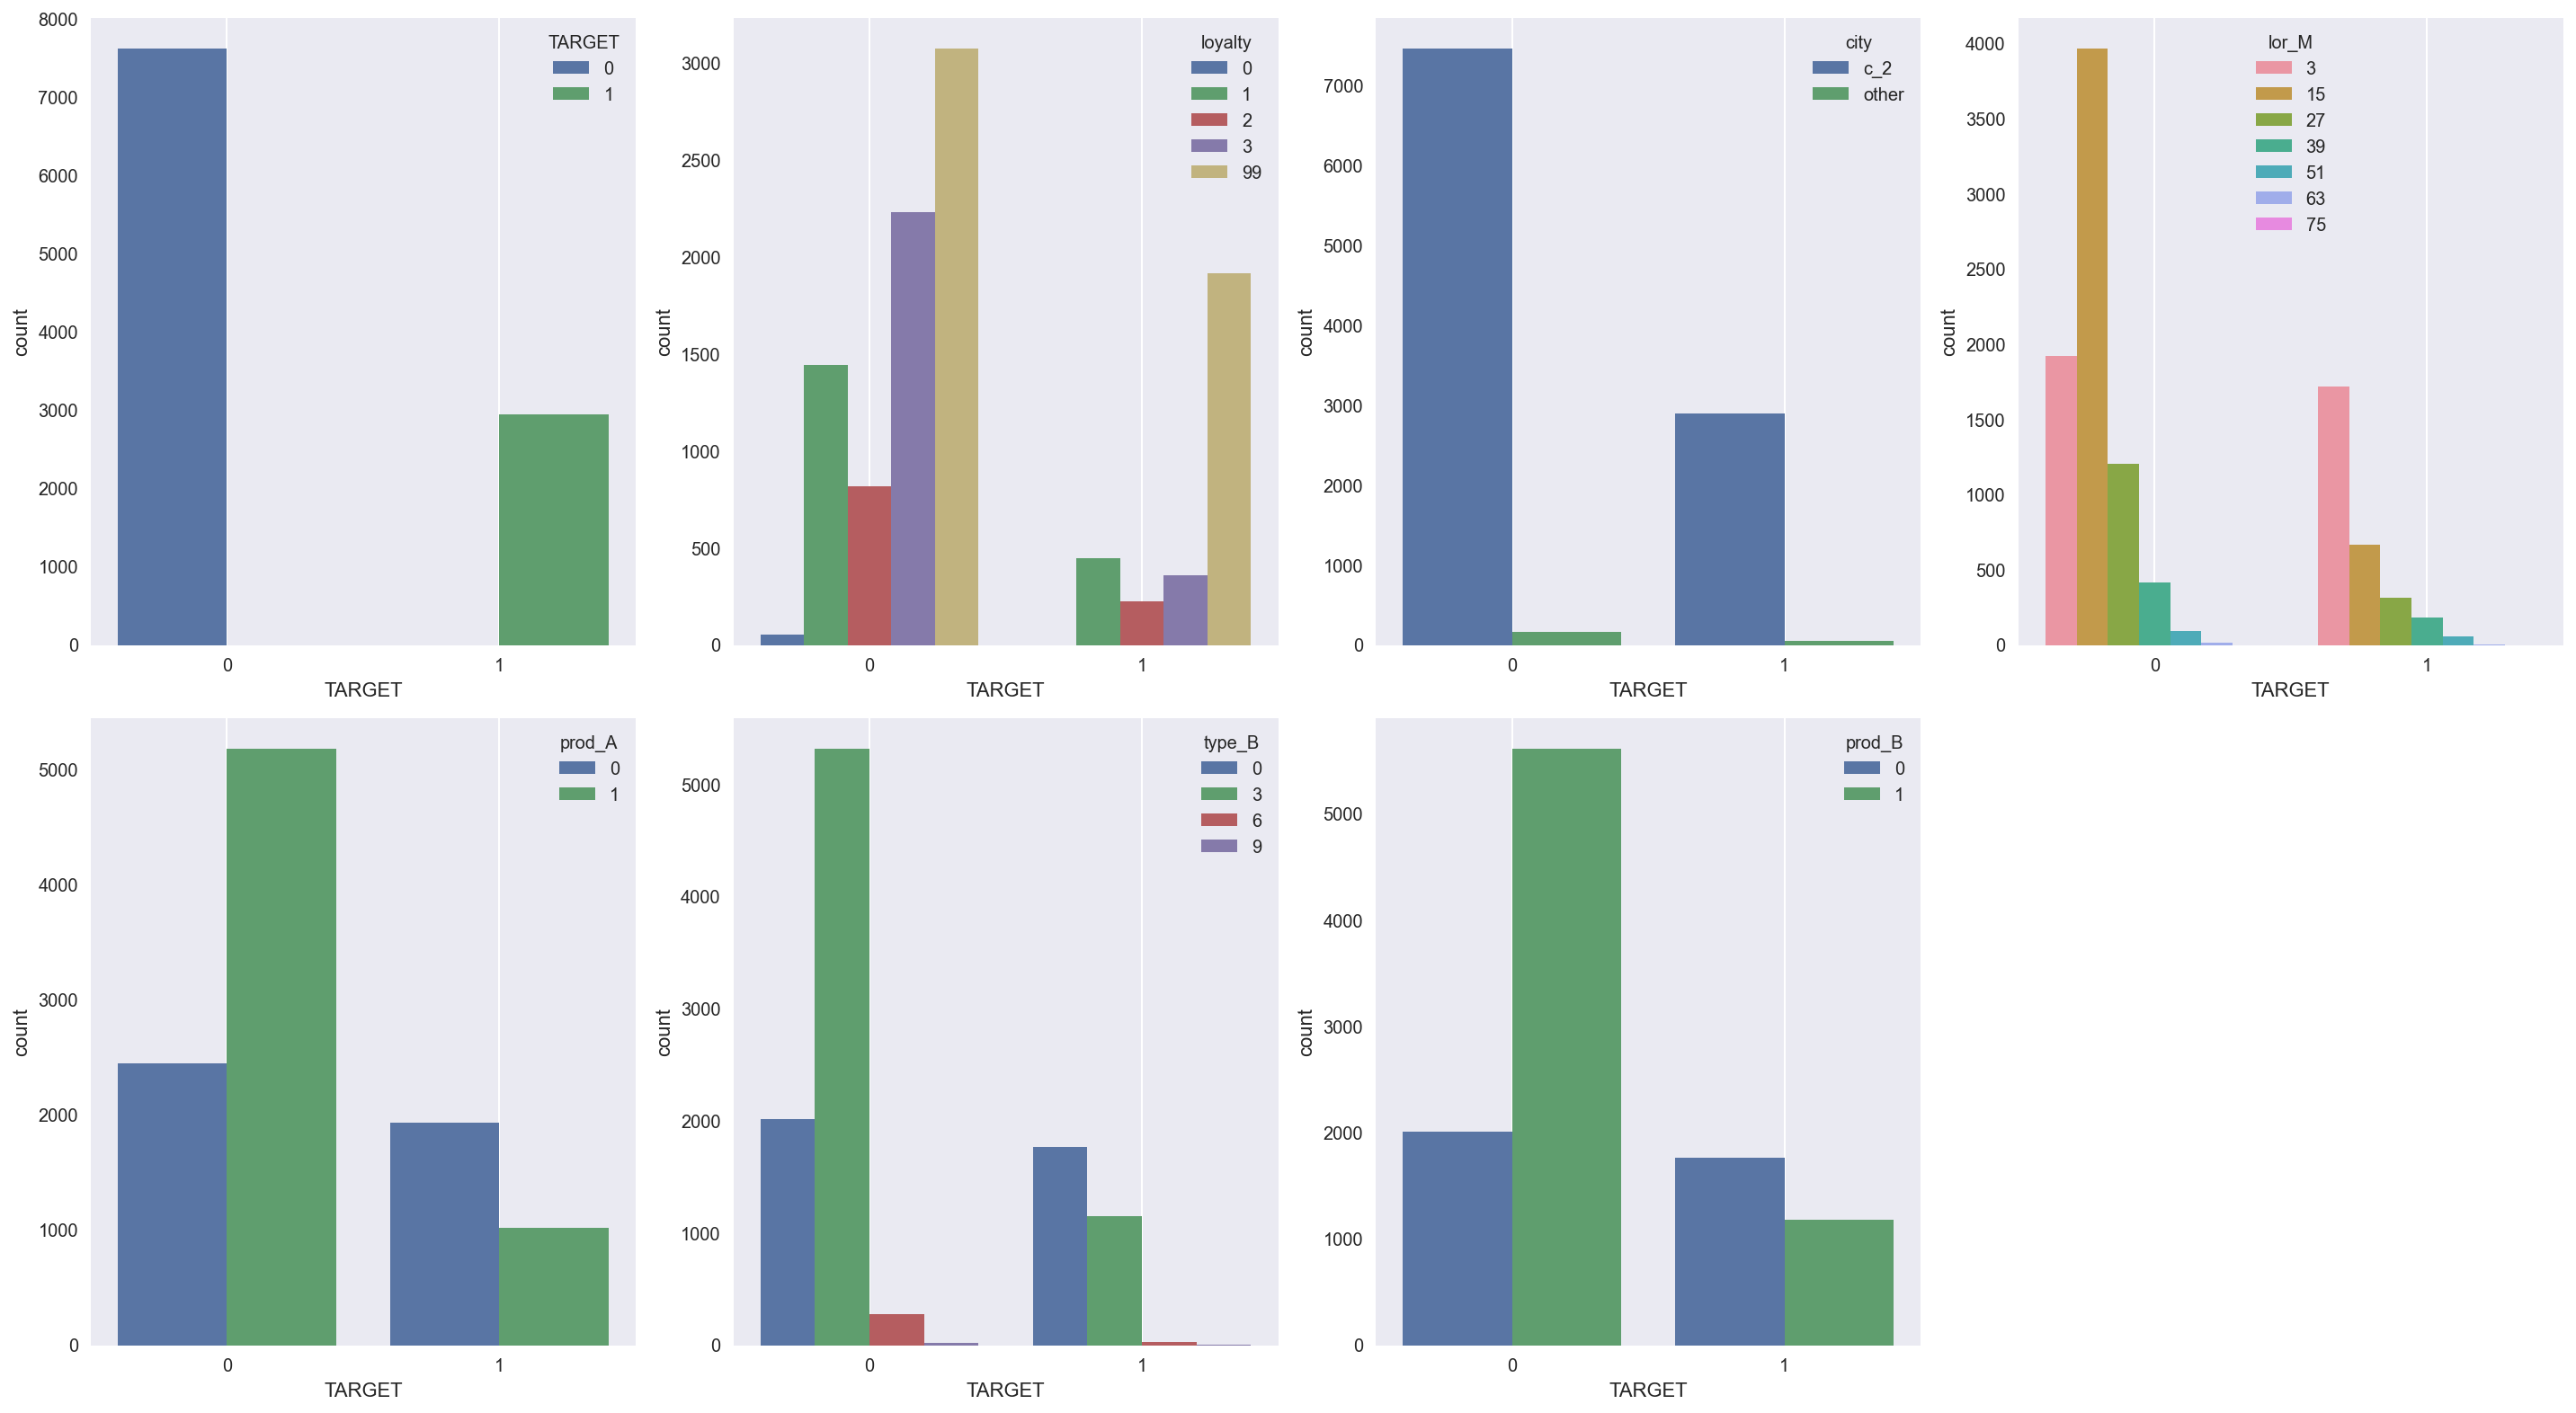

In [72]:
# To use bar charts to compare pairs of variables between Response and Explanatory
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(['TARGET'] + cat_cols)):
    plt.subplot(3, 4, i + 1)
    # sns.countplot(x=col, data=re_eda_df, color='blue')
    sns.countplot(x='TARGET', hue=col, data=prepared_is_df)
    plt.grid()
    plt.tight_layout()

### Summary of Re-EDA

Response: TARGET

Numerical Variables: age, turnover_A, turnover_B.

Categorical Varables: 'loyalty', 'city', 'lor_M', 'prod_A', 'type_B', 'prod_B'

The correlation values between response (TARGET) and other variables have decreased. Numerical variables become more concentrate and have less outliers.

# 6. Feature selecting
- Split data set
- normalization & standardization
- Random Forest
- 

Split data set & normalization & standardization
Usually, I use StandardScaler to convert data from different scales to the same scales. Variables with same scales can get a good accurate when training a model.

If variables of data have many outliers, RobustScaler can solve outliers better than StandardScaler.

In [73]:
def get_train_test_X_y(data_df, y_col, size=0.3, std_cols=None):
    y = data_df[y_col]
    X = data_df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    cols = X.columns
    
    if std_cols:
        # std = preprocessing.StandardScaler()
        
        # RobustScaler can solve outliers better than StandardScaler
        std = preprocessing.RobustScaler()
        
        fitted = std.fit_transform(X_train[std_cols])
        
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        
        test_fit = std.transform(X_test[std_cols])
        
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

In [74]:
# response column
response_col = ['TARGET']

# all number columns
num_cols = ['turnover_A', 'turnover_B', 'age']

# all categorical columns
cat_cols =  ['loyalty', 'city', 'lor_M', 'prod_A', 'type_B', 'prod_B']

In [75]:
# Create train and test set
X_train, X_test, y_train, y_test = get_train_test_X_y(prepared_is_df, "TARGET", std_cols=None)

# check X_train
X_train.shape

(7406, 9)

In [76]:
# how many people bought products in the training set?
y_train.values.sum()

2064

In [77]:
# what percentage of the training set survived?
y_train.values.sum() / X_train.shape[0] * 100

27.869295166081553

Since we know that 27.87% of the people in the training set bought products, we could achieve a training model accuracy of (100 - 27.87) = 72.13% by simply predicting "Did not but product" for each customer. This metric is referred to as the __null error rate__.  When evaluating the performance of a binary logistic regression model, always check to see whether the accuracy models are attaining exceeds the __null error rate__. If not, model is unlikely to be of any value.

__Dummy the categorical variables__ Before using feature selection methods, we should dummy the categories.

In [78]:
# Dummy the X_train
X_train_dummy = pd.get_dummies(X_train)
X_train_dummy.head(3)

,age,turnover_A,turnover_B,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99,city_c_2,city_other,prod_A_0,prod_A_1,type_B_0,type_B_3,type_B_6,type_B_9,prod_B_0,prod_B_1,lor_M_3,lor_M_15,lor_M_27,lor_M_39,lor_M_51,lor_M_63,lor_M_75
7660,23,361.950653,219.506302,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
2912,33,466.372516,257.062699,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
9528,64,374.484900,237.725270,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0


__RandomForestClassifier__ can select features for Logistic Regression Model.

In [79]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

model_rfr = SelectFromModel(RandomForestClassifier()).fit(X_train_dummy, y_train)

mask = model_rfr.get_support()
features_model_1 = X_train_dummy.columns[mask]

print(features_model_1)


Index(['age', 'turnover_A', 'turnover_B'], dtype='object')


__GradientBoostingClassifier__ can select features for Logistic Regression Model.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gb_rfr = SelectFromModel(GradientBoostingClassifier()).fit(X_train_dummy, y_train)

mask = gb_rfr.get_support()
features_model_2 = X_train_dummy.columns[mask]

print(features_model_2)

Index(['age', 'turnover_A', 'turnover_B', 'type_B_0'], dtype='object')


__SVC__ can select features for Logistic Regression Model.

In [81]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=0.01, penalty = "l1", dual=False).fit(X_train_dummy, y_train)
model_lsvc = SelectFromModel(lsvc, prefit=True)

mask = model_lsvc.get_support()
features_model_3 = X_train_dummy.columns[mask]

print(features_model_3)

Index(['age', 'turnover_A', 'turnover_B', 'loyalty_1', 'prod_A_1', 'type_B_3',
       'prod_B_1', 'lor_M_15'],
      dtype='object')


D:\dev\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# 7. Regression Modeling

3 Logistic Regression

<AxesSubplot:>

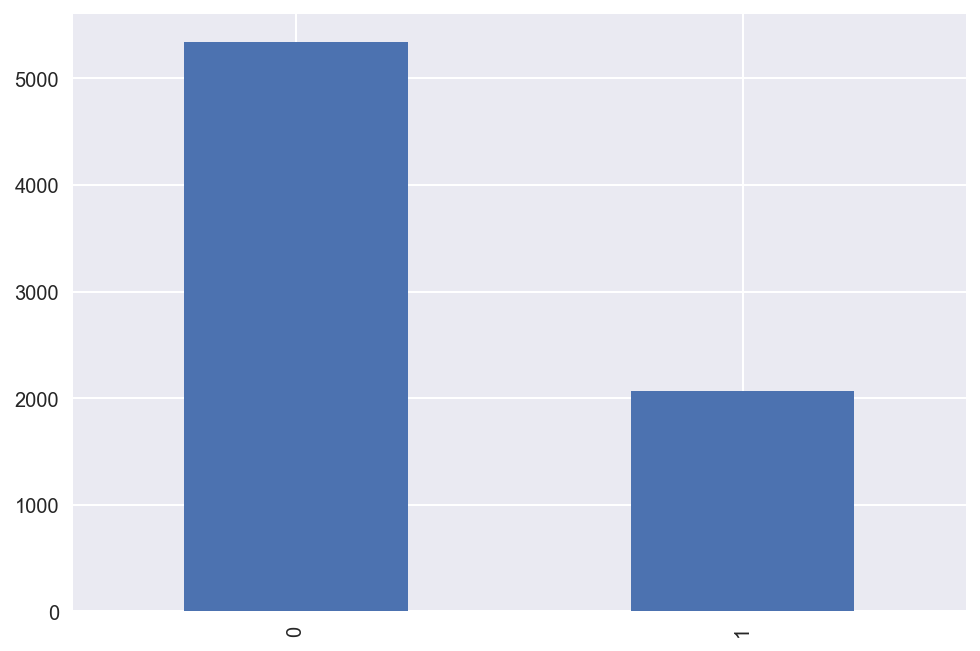

In [82]:
y_train.value_counts().plot.bar()

It is an imbalance response.

In [83]:
# load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [84]:
def print_coef_feature(model_, features_):
    
    # Print the names of the columns.
    print ("{:<20} {:<10} ".format('feature', 'coef'))
    
    for coef, feat in zip(model_.coef_[0,:], features_):
        
        print("{:<10} {:<10}".format(feat, coef))

In [85]:
# use cross validation to fit train set
def my_lr_cv(model_name, model_, X_df, y_df, cv = 5):
    
    roc_arr = []
    accuracy_arr = []
    precision_arr = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    
    i = 1
    for train_idx, test_idx in kf.split(X_df):

        X_train_, X_test_ = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train_, y_test_ = y_df.iloc[train_idx], y_df.iloc[test_idx]

        #Train the model
        model_.fit(X_train_, y_train_) #Training the model
        
        roc = roc_auc_score(y_test_, model_.predict(X_test_))
        roc_arr.append(roc)
        
        accuracy = accuracy_score(y_test_, model_.predict(X_test_))
        accuracy_arr.append(accuracy)
        
        precision = precision_score(y_test_, model_.predict(X_test_))
        precision_arr.append(precision)
        
        #print(f"fold no. %d on the KFold test set: accuracy = %.4f, precision = %.4f, ROC_AUC = %.4f" %(i, accuracy, precision, roc))

        i += 1
        
    print(f"On the KFold = %d test set: Avg. accuracy = %.4f, Avg. precision = %.4f, Avg. ROC_AUC = %.4f" 
          %(cv, np.mean(accuracy_arr), np.mean(precision_arr), np.mean(roc_arr)))
    
    return {"model_name":model_name, "roc_arr":roc_arr, "accuracy_arr":accuracy_arr, "precision_arr":precision_arr,}

__It is an imbalance response. Before I start training models, I will resample the response.__

In [86]:
# import lib
import imblearn
# import over sample method
from imblearn.over_sampling import SMOTENC

# use category + numeric method to run the over sampling

# [0, 2] are indexs of ['loyalty', 'city']
smote_nc = SMOTENC(categorical_features=[0,2,3,4,5,8], random_state=13)
X_smo, y_smo = smote_nc.fit_resample(X_train, y_train)

In [87]:
# Check the number of two types for Response variable
y_smo.value_counts()

0    5342
1    5342
Name: TARGET, dtype: int64

In [88]:
# Dummy the categorival variables
X_dummy_smo = pd.get_dummies(X_smo)
X_dummy_smo.head(3)

,age,turnover_A,turnover_B,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99,city_c_2,city_other,prod_A_0,prod_A_1,type_B_0,type_B_3,type_B_6,type_B_9,prod_B_0,prod_B_1,lor_M_3,lor_M_15,lor_M_27,lor_M_39,lor_M_51,lor_M_63,lor_M_75
0,23,361.950653,219.506302,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
1,33,466.372516,257.062699,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,64,374.484900,237.725270,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [89]:
# set value to X_train_dummy & y_train
X_train_dummy = X_dummy_smo
y_train = y_smo

#### Model 1

In [90]:
# using the LogisticRegression() method for this model
model1 = LogisticRegression(solver='lbfgs', max_iter=1000)

model1_result = my_lr_cv("model_1", model1, X_train_dummy[features_model_1], y_train)

On the KFold = 5 test set: Avg. accuracy = 0.7298, Avg. precision = 0.7559, Avg. ROC_AUC = 0.7300


In [91]:
# show the coef
print_coef_feature(model1, features_model_1)

feature              coef       
age        0.05789101850904685
turnover_A 0.01926882484481534
turnover_B -0.0022423794724167638


From result of model 1 we see that:

age: An increase in the value of 'age' is associated with a increased likelihood of TARGET (yes, this customer will buy new insurance.)

turnover_A: An increase in the value of 'turnover_A' is associated with a increased likelihood of TARGET.

turnover_B: An increase in the value of 'turnover_B' is associated with a decreased likelihood of TARGET.

#### Model 2

In [92]:
# show the selected features
features_model_2

Index(['age', 'turnover_A', 'turnover_B', 'type_B_0'], dtype='object')

In [93]:
model2 = LogisticRegression(max_iter=1000)

# cross validation train set
model2_result = my_lr_cv("model_2", model2, X_train_dummy[features_model_2], y_train)

On the KFold = 5 test set: Avg. accuracy = 0.7493, Avg. precision = 0.7613, Avg. ROC_AUC = 0.7495


In [94]:
# show the coef
print_coef_feature(model2, features_model_2)

feature              coef       
age        0.05571983253143176
turnover_A 0.0200939149988978
turnover_B -0.0015412456928299838
type_B_0   1.4967227961644278


From result of model 2 we see that:

age: An increase in the value of 'age' is associated with a increased likelihood of TARGET (yes, this customer will buy new insurance.)

turnover_A: An increase in the value of 'turnover_A' is associated with a increased likelihood of TARGET.

turnover_B: An increase in the value of 'turnover_B' is associated with a decreased likelihood of TARGET.
    
type_B_0 : If customers bought the ( 'type_B' = 0 ), it will increase likelihood of TARGET.

#### Model 3

In [95]:
# show the selected features
features_model_3

Index(['age', 'turnover_A', 'turnover_B', 'loyalty_1', 'prod_A_1', 'type_B_3',
       'prod_B_1', 'lor_M_15'],
      dtype='object')

In [96]:
# using the LogisticRegression() method for this model
model3 = LogisticRegression(solver='lbfgs', max_iter=1000)

# cross validation train set
model3_result = my_lr_cv("model_3", model3, X_train_dummy[features_model_3], y_train)

On the KFold = 5 test set: Avg. accuracy = 0.7507, Avg. precision = 0.7630, Avg. ROC_AUC = 0.7509


In [97]:
# show coef
print_coef_feature(model3, features_model_3)

feature              coef       
age        0.05553168426124417
turnover_A 0.020171709481364094
turnover_B -0.0009298744418427441
loyalty_1  -0.2742141421570947
prod_A_1   -0.36143952512793204
type_B_3   1.4628758502976453
prod_B_1   -2.3632587905611637
lor_M_15   -0.2726603830506805


From result of model 3 we see that:

age: An increase in the value of 'age' is associated with a increased likelihood of TARGET (yes, this customer will buy new insurance.)

turnover_A: An increase in the value of 'turnover_A' is associated with a increased likelihood of TARGET.

turnover_B: An increase in the value of 'turnover_B' is associated with a decreased likelihood of TARGET.

loyalty_1: If the level of loyalty is 1, it will decrease likelihood of TARGET.
    
prod_A_1 : If customers bought the ( 'prod_A' = 1 ), it will decrease likelihood of TARGET.

prod_B_1 : If customers bought the ( 'prod_B' = 1 ), it will decrease likelihood of TARGET.

lor_M_15 : If customers has 15 months relationship, it will decrease likelihood of TARGET.

#### compare 3 models

In [98]:
arr = [model1_result, model2_result, model3_result]

# {"model_name":"model_1", "roc_arr":roc_arr, "accuracy_arr":accuracy_arr, "precision_arr":precision_arr,}
for m in arr:
    print(f"%s : Avg. accuracy = %.4f, Avg. precision = %.4f, Avg. ROC_AUC = %.4f" 
          %(m['model_name'], np.mean(m['accuracy_arr']), np.mean(m['precision_arr']), np.mean(m['roc_arr'])))

model_1 : Avg. accuracy = 0.7298, Avg. precision = 0.7559, Avg. ROC_AUC = 0.7300
model_2 : Avg. accuracy = 0.7493, Avg. precision = 0.7613, Avg. ROC_AUC = 0.7495
model_3 : Avg. accuracy = 0.7507, Avg. precision = 0.7630, Avg. ROC_AUC = 0.7509


### Summary

I prefer the model 2 because it has only 4 features, which is easy to interpretate with a good accuracy score and acceptable precision. Next, I will go to dig into interpretating the model 2.

# 8. Select Models

In [99]:
# use model2 to get the predictions from train set

In [100]:
y_train_predict = model2.predict(X_train_dummy[features_model_2])

In [101]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      5342
           1       0.76      0.73      0.74      5342

    accuracy                           0.75     10684
   macro avg       0.75      0.75      0.75     10684
weighted avg       0.75      0.75      0.75     10684



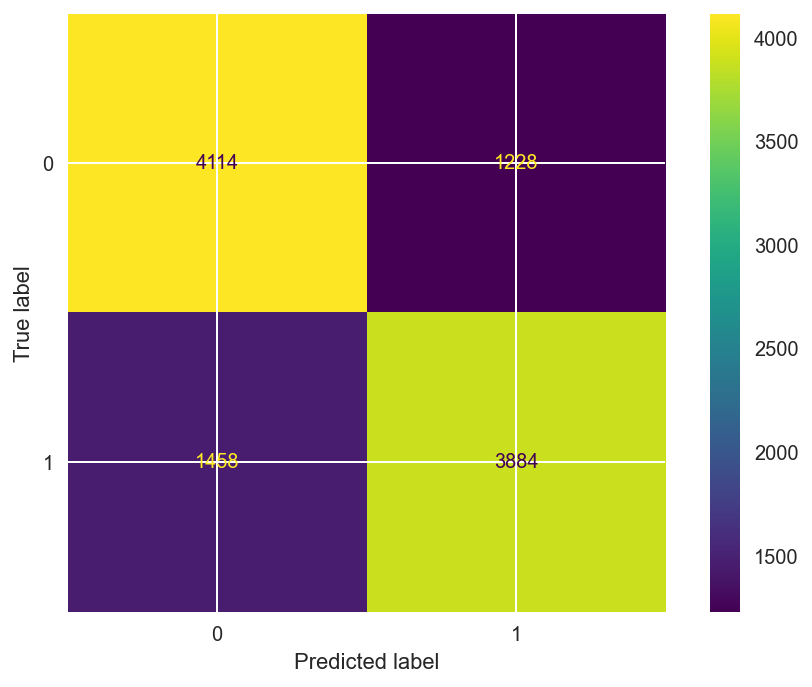

In [102]:
plot_confusion_matrix(model2, X_train_dummy[features_model_2], y_train)

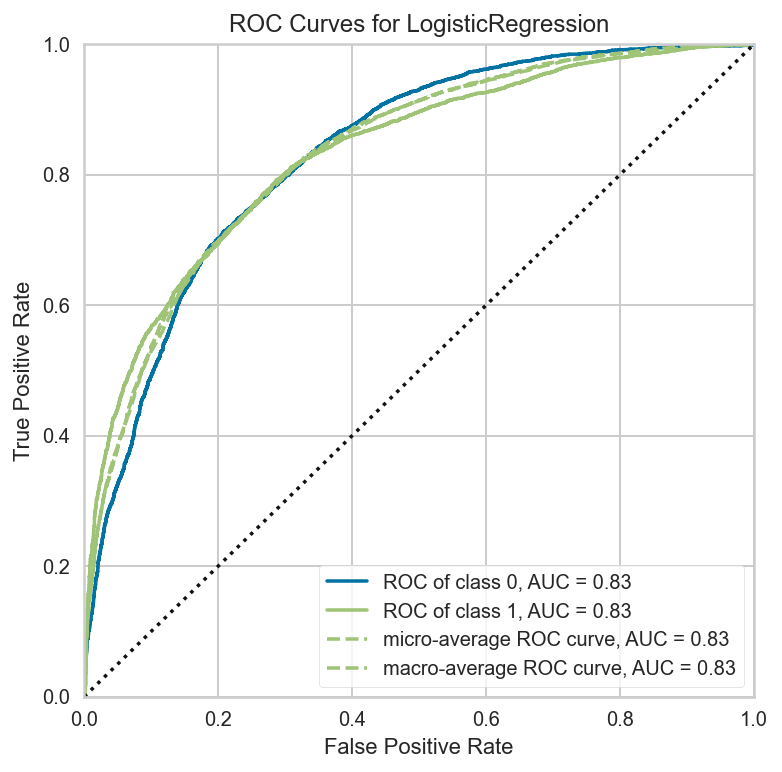

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [103]:
# draw a ROC curve.
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(model2)
roc_viz.fit(X_train_dummy[features_model_2], y_train)
roc_viz.score(X_train_dummy[features_model_2], y_train)
roc_viz.poof()

The model on the train set has:

recall = 0.73

precision = 0.76

AUC = 0.83

#### predict the imblanced test set

In [104]:
# dummy the test set
X_test_dummy = pd.get_dummies(X_test)
X_test_dummy.head(3)

,age,turnover_A,turnover_B,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99,city_c_2,city_other,prod_A_0,prod_A_1,type_B_0,type_B_3,type_B_6,type_B_9,prod_B_0,prod_B_1,lor_M_3,lor_M_15,lor_M_27,lor_M_39,lor_M_51,lor_M_63,lor_M_75
5529,25,323.300104,216.242052,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
9228,23,330.211930,202.413822,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
9987,33,324.273781,247.746917,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0


Generate predictions for the test data using our new model

In [105]:
# predict the test set
y_predict = model2.predict(X_test_dummy[features_model_2])

### Evaluate the model with imbalanced test set

In [106]:
# the auc score of test set
roc_auc_score(y_test, model2.decision_function(X_test_dummy[features_model_2]))

0.8377040929612908

In [109]:
test_predictions = model2.predict(X_test_dummy[features_model_2])

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      2290
           1       0.56      0.74      0.64       885

    accuracy                           0.76      3175
   macro avg       0.72      0.76      0.73      3175
weighted avg       0.79      0.76      0.77      3175



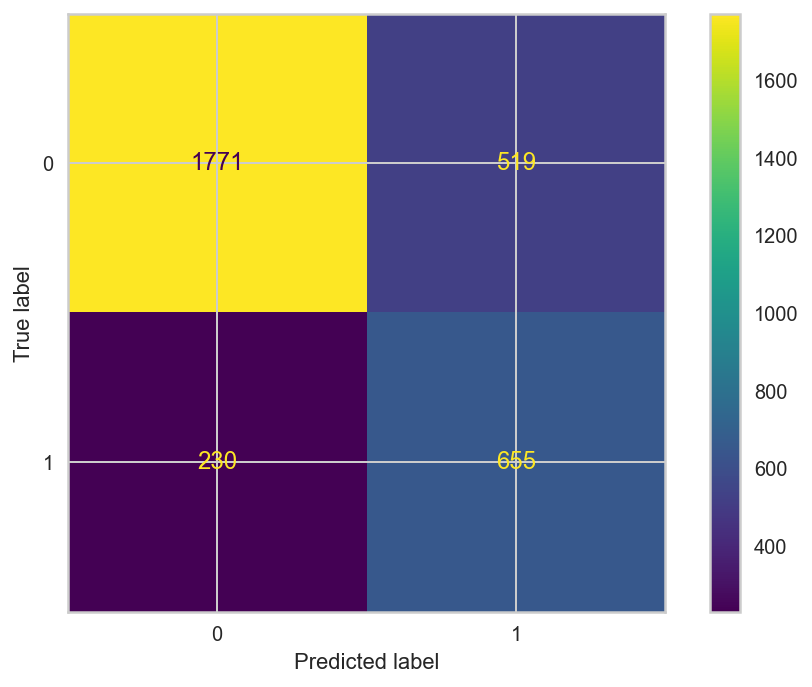

In [110]:
plot_confusion_matrix(model2, X_test_dummy[features_model_2], y_test)

# print(confusion_matrix(y_test, test_predictions))

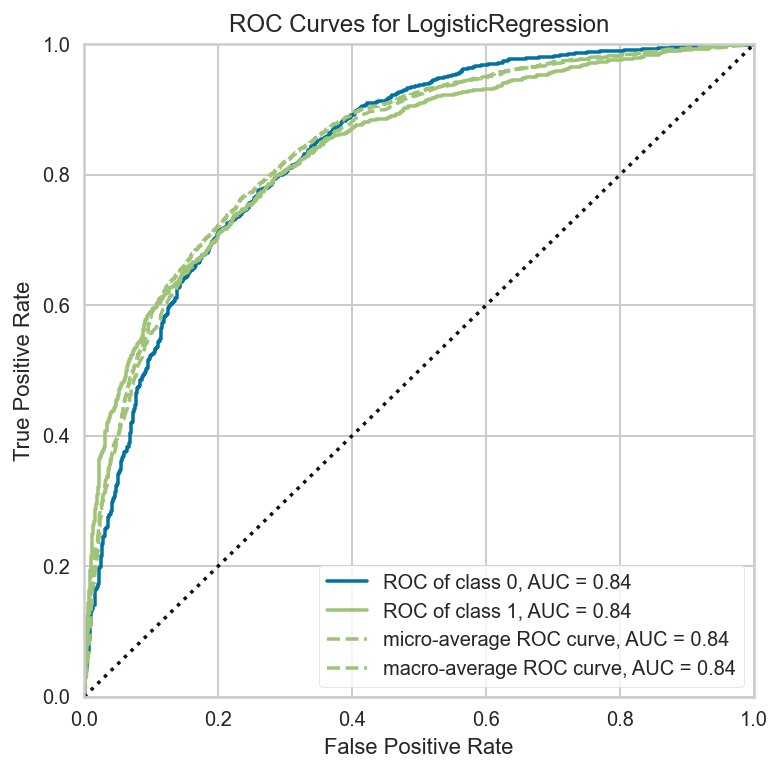

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [111]:
# draw a ROC curve.
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(model2)
roc_viz.fit(X_test_dummy[features_model_2], y_test)
roc_viz.score(X_test_dummy[features_model_2], y_test)
roc_viz.poof()

The model on the test set has:

recall = 0.74

precision = 0.56

AUC = 0.84

In [112]:
# coef
print_coef_feature(model2, features_model_2)

feature              coef       
age        0.05571983253143176
turnover_A 0.0200939149988978
turnover_B -0.0015412456928299838
type_B_0   1.4967227961644278


### Summary

I use over sampling to solve the imbalanced TARGET.

- The coefficient shows:

age: An increase in the value of 'age' is associated with a increased likelihood of TARGET (yes, this customer will buy new insurance.)

turnover_A: An increase in the value of 'turnover_A' is associated with a increased likelihood of TARGET.

turnover_B: An increase in the value of 'turnover_B' is associated with a decreased likelihood of TARGET.

type_B_0 : If customers bought the ( 'type_B' = 0 ), it will increase likelihood of TARGET.


- The evaluations of model on __train set (over sampling balanced set)__ are followed:

recall = 0.73; precision = 0.76; Accuracy = 0.76; AUC = 0.83

- The evaluations of model on __test set (imbalanced set)__ are followed:

recall = 0.74; precision = 0.56; Accuracy = 0.77; AUC = 0.84

- The __baseline__ of the data set is Accuracy of (100 - 27.87) = 72.13%.

I got a model that the Accuracy of test set is higher than baseline with around 5%.

# 9. Conclusion

- Exploration Data Analysis

In the EDA, I found that some variables are multicollinearity with others. Also, I found that ID is the unique identification of an observation. Thrid, there are outliers in the numerical variables.

- Data Preparation

I dropped duplicated rows. I dropped one variable that is multicollinearity with other. Also, I dropped the ID and Outliers

- Feature selection

I used Random Forrest, GradientBoostingClassifier, and LinearSVC to select features.

- Model

I chose LogisticRegression to predict the TARGET(1=Yes, 0=No). From three models with different features, I selected a model that used 4 features that are easy to interpretate, although the AUC of the model is not the highest in the 3 models.

# 10. Reference

https://www.kaggle.com/rluyck/insurance-company

https://scikit-learn.org/

https://imbalanced-learn.org/